# Anomaly Detection Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import env
from wrangle import wrangle_log_data, get_log_data
import explore as e

In [2]:
df = wrangle_log_data()

### **Let's get to know this dataset:**

In [3]:
df.head()

,date,time,path,user_id,cohort_id,name,start_date,end_date,program_id
date_time,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22,Teddy,2018-01-08,2018-05-17,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  object        
 1   time        900223 non-null  object        
 2   path        900223 non-null  object        
 3   user_id     900223 non-null  int64         
 4   cohort_id   900223 non-null  int64         
 5   name        900223 non-null  object        
 6   start_date  900223 non-null  datetime64[ns]
 7   end_date    900223 non-null  datetime64[ns]
 8   program_id  900223 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 68.7+ MB


In [5]:
df.start_date.nunique()

45

In [6]:
df.cohort_id.nunique()

48

In [7]:
# when do the log files start and end?

In [8]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

In [9]:
# just over three years of data from 2018-01-26 to 2021-04-21


In [10]:
# trying to understand the cohorts firstoff
df.program_id.value_counts()

2      713365
3      103412
999     52893
1       30548
4           5
Name: program_id, dtype: int64

In [11]:
df[df.program_id == 1].groupby(by='path').count().sort_values(
    by='date', ascending=False).head(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,1681,1681,1681,1681,1681,1681,1681,1681
index.html,1011,1011,1011,1011,1011,1011,1011,1011
javascript-i,736,736,736,736,736,736,736,736
html-css,542,542,542,542,542,542,542,542
spring,501,501,501,501,501,501,501,501
java-iii,479,479,479,479,479,479,479,479
java-ii,454,454,454,454,454,454,454,454
java-i,444,444,444,444,444,444,444,444
javascript-ii,429,429,429,429,429,429,429,429


In [12]:
# program_id 1 looks a lot like web dev to me... all javascript
# and html

In [13]:
df[df.program_id == 2].groupby(by='path').count().sort_values(
    by='date', ascending=False).head(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,35814,35814,35814,35814,35814,35814,35814,35814
javascript-i,17457,17457,17457,17457,17457,17457,17457,17457
toc,17428,17428,17428,17428,17428,17428,17428,17428
search/search_index.json,15212,15212,15212,15212,15212,15212,15212,15212
java-iii,12683,12683,12683,12683,12683,12683,12683,12683
html-css,12569,12569,12569,12569,12569,12569,12569,12569
java-ii,11719,11719,11719,11719,11719,11719,11719,11719
spring,11376,11376,11376,11376,11376,11376,11376,11376
jquery,10693,10693,10693,10693,10693,10693,10693,10693


In [14]:
# program_id 2 also looks like web dev. Maybe they moodified the curriculum as
# I saw some PHP in program_id 1. Let's check start dates
df[df.program_id == 1].groupby(by=['start_date', 'name']).count()

,,date,time,path,user_id,cohort_id,end_date,program_id
start_date,name,,,,,,,
2014-02-04,Arches,8890,8890,8890,8890,8890,8890,8890
2014-06-04,Badlands,93,93,93,93,93,93,93
2014-10-20,Denali,4,4,4,4,4,4,4
2014-11-18,Everglades,1,1,1,1,1,1,1
2015-02-03,Franklin,72,72,72,72,72,72,72
2015-06-05,Glacier,598,598,598,598,598,598,598
2015-09-22,Hampton,1712,1712,1712,1712,1712,1712,1712
2016-01-20,Ike,253,253,253,253,253,253,253
2016-03-08,Joshua,302,302,302,302,302,302,302


In [15]:
# ok, program_id 1 is 13 cohorts. They have a really large disparity of counts
# Dates are February 2014 to June 2017.
# Check for program_id 2
df[df.program_id == 2].groupby(by=['start_date', 'name']).count()

,,date,time,path,user_id,cohort_id,end_date,program_id
start_date,name,,,,,,,
2014-02-04,Staff,84031,84031,84031,84031,84031,84031,84031
2016-09-26,Mammoth,691,691,691,691,691,691,691
2016-10-26,Niagara,755,755,755,755,755,755,755
2017-03-27,Pinnacles,2158,2158,2158,2158,2158,2158,2158
2017-09-27,Sequoia,7444,7444,7444,7444,7444,7444,7444
2018-01-08,Teddy,30926,30926,30926,30926,30926,30926,30926
2018-03-05,Ulysses,28534,28534,28534,28534,28534,28534,28534
2018-05-29,Voyageurs,35636,35636,35636,35636,35636,35636,35636
2018-07-23,Wrangell,25586,25586,25586,25586,25586,25586,25586


In [16]:
# program_id 2 has 28 cohorts including staff. Non-staff cohorts
# go from September 2016 to April 2021. There are three cohorts, 
# Mammoth, Niagara, and Pinnacles that overlap the program_id 1
# cohorts in late 2016- early 2017. Maybe they taught some courses
# with PHP and some without during a transition period?
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  object        
 1   time        900223 non-null  object        
 2   path        900223 non-null  object        
 3   user_id     900223 non-null  int64         
 4   cohort_id   900223 non-null  int64         
 5   name        900223 non-null  object        
 6   start_date  900223 non-null  datetime64[ns]
 7   end_date    900223 non-null  datetime64[ns]
 8   program_id  900223 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 68.7+ MB


In [17]:
# what cohorts started before the logs we've been given?
df[df.start_date < df.index.min()].groupby('name').count()

,date,time,path,user_id,cohort_id,start_date,end_date,program_id
name,,,,,,,,
Apollo,5,5,5,5,5,5,5,5
Arches,8890,8890,8890,8890,8890,8890,8890,8890
Badlands,93,93,93,93,93,93,93,93
Denali,4,4,4,4,4,4,4,4
Everglades,1,1,1,1,1,1,1,1
Franklin,72,72,72,72,72,72,72,72
Glacier,598,598,598,598,598,598,598,598
Hampton,1712,1712,1712,1712,1712,1712,1712,1712
Ike,253,253,253,253,253,253,253,253


In [18]:
df[df.end_date < df.index.min()].groupby('name').count().shape

(19, 8)

In [19]:
# let's take a look at program_id 3
df[df.program_id == 3].groupby(by=['start_date', 'name']).count()

,,date,time,path,user_id,cohort_id,end_date,program_id
start_date,name,,,,,,,
2019-08-19,Bayes,26538,26538,26538,26538,26538,26538,26538
2020-02-03,Curie,21582,21582,21582,21582,21582,21582,21582
2020-07-13,Darden,32015,32015,32015,32015,32015,32015,32015
2020-12-07,Easley,14715,14715,14715,14715,14715,14715,14715
2021-03-15,Florence,8562,8562,8562,8562,8562,8562,8562


In [20]:
# these look like data science names to me
# let's take a look at their top paths
df[df.program_id == 3].groupby(by='path').count().sort_values(
    by='date', ascending=False).head(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,8358,8358,8358,8358,8358,8358,8358,8358
search/search_index.json,2203,2203,2203,2203,2203,2203,2203,2203
classification/overview,1785,1785,1785,1785,1785,1785,1785,1785
1-fundamentals/modern-data-scientist.jpg,1655,1655,1655,1655,1655,1655,1655,1655
1-fundamentals/AI-ML-DL-timeline.jpg,1651,1651,1651,1651,1651,1651,1651,1651
1-fundamentals/1.1-intro-to-data-science,1633,1633,1633,1633,1633,1633,1633,1633
classification/scale_features_or_not.svg,1590,1590,1590,1590,1590,1590,1590,1590
fundamentals/AI-ML-DL-timeline.jpg,1443,1443,1443,1443,1443,1443,1443,1443
fundamentals/modern-data-scientist.jpg,1438,1438,1438,1438,1438,1438,1438,1438


In [21]:
# Yeup, definitely ds cohorts for program_id 3

In [22]:
# check out program_id 4
df[df.program_id == 4].groupby(by=['start_date', 'name']).count()

,,date,time,path,user_id,cohort_id,end_date,program_id
start_date,name,,,,,,,
2015-03-30,Apollo,5,5,5,5,5,5,5


In [23]:
# see what pages they access
df[df.program_id == 4].groupby(by='path').count().sort_values(
    by='date', ascending=False).head(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
content/html-css,2,2,2,2,2,2,2,2
/,1,1,1,1,1,1,1,1
content/html-css/gitbook/images/favicon.ico,1,1,1,1,1,1,1,1
content/html-css/introduction.html,1,1,1,1,1,1,1,1


In [24]:
# hmmm. program_id 4 looks like some kind of pilot or special program
# let's see what the log entries look like.
df[df.program_id == 4]

,date,time,path,user_id,cohort_id,name,start_date,end_date,program_id
date_time,,,,,,,,,
2018-03-22 19:01:49,2018-03-22,19:01:49,/,152,9,Apollo,2015-03-30,2015-07-29,4
2018-03-22 19:01:54,2018-03-22,19:01:54,content/html-css,152,9,Apollo,2015-03-30,2015-07-29,4
2018-03-22 19:01:54,2018-03-22,19:01:54,content/html-css/gitbook/images/favicon.ico,152,9,Apollo,2015-03-30,2015-07-29,4
2018-03-22 19:02:47,2018-03-22,19:02:47,content/html-css,152,9,Apollo,2015-03-30,2015-07-29,4
2018-03-22 19:02:52,2018-03-22,19:02:52,content/html-css/introduction.html,152,9,Apollo,2015-03-30,2015-07-29,4


In [25]:
# all css stuff by one user within just over one minute
# all by the same user from the 2015 cohort.
# seems pretty irrelavent

In [26]:
# I assigned the logs without a program id to 999.
# take a quick look at what they looked at:
df[df.program_id == 999].groupby(by='path').count().sort_values(
    by='date', ascending=False).head(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,4459,4459,4459,4459,4459,4459,4459,4459
search/search_index.json,1985,1985,1985,1985,1985,1985,1985,1985
javascript-i,780,780,780,780,780,780,780,780
toc,706,706,706,706,706,706,706,706
spring,641,641,641,641,641,641,641,641
java-iii,567,567,567,567,567,567,567,567
html-css,508,508,508,508,508,508,508,508
java-ii,508,508,508,508,508,508,508,508
jquery,484,484,484,484,484,484,484,484


In [27]:
# check out the bottom 55
df[df.program_id == 999].groupby(by='path').count().sort_values(
    by='date', ascending=False).tail(55)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
fundamentals,1,1,1,1,1,1,1,1
content/html-css/css-i/gitbook/images/favicon.ico,1,1,1,1,1,1,1,1
10_Projects,1,1,1,1,1,1,1,1
distributed-ml/explore,1,1,1,1,1,1,1,1
7_exercises,1,1,1,1,1,1,1,1
7_Projects,1,1,1,1,1,1,1,1
examples/postwork/reports.yml,1,1,1,1,1,1,1,1
login.aspx,1,1,1,1,1,1,1,1
content/git/pushing-and-pulling.html,1,1,1,1,1,1,1,1


In [28]:
# there seem to be more web dev pages at the top and more ds pages at the bottom.
# Could reflect that it is a staff category and data science had only a few cohorts
# in this dataset

In [29]:
# I think it will be useful to make dfs for each of the program_ids:
wd1 = df[df.program_id == 1]
wd2 = df[df.program_id == 2]
ds = df[df.program_id == 3]
apollo = df[df.program_id == 4]
other = df[df.program_id == 999]

#### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [30]:
# checking for most popular page for program wd1
wd1.groupby('path').count().sort_values(by = 'date', ascending=False)
        

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,1681,1681,1681,1681,1681,1681,1681,1681
index.html,1011,1011,1011,1011,1011,1011,1011,1011
javascript-i,736,736,736,736,736,736,736,736
html-css,542,542,542,542,542,542,542,542
spring,501,501,501,501,501,501,501,501
...,...,...,...,...,...,...,...,...
interview-questions,1,1,1,1,1,1,1,1
13.5_Tableau,1,1,1,1,1,1,1,1
interview,1,1,1,1,1,1,1,1


In [31]:
# if we take out the root and index, javascript-i is most popular lesson

In [32]:
# now check wd2
wd2.groupby('path').count().sort_values(by = 'date', ascending=False)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,35814,35814,35814,35814,35814,35814,35814,35814
javascript-i,17457,17457,17457,17457,17457,17457,17457,17457
toc,17428,17428,17428,17428,17428,17428,17428,17428
search/search_index.json,15212,15212,15212,15212,15212,15212,15212,15212
java-iii,12683,12683,12683,12683,12683,12683,12683,12683
...,...,...,...,...,...,...,...,...
content/mysql/relationships/sub-queries.html,1,1,1,1,1,1,1,1
content/mysql/sample-database/gitbook/images/favicon.ico,1,1,1,1,1,1,1,1
content/php_iii/classes-and-objects-i/constructors-destructors.html,1,1,1,1,1,1,1,1


In [33]:
# javascript-i is the most popular lesson here as well

In [34]:
# now check for ds cohorts

In [35]:
ds.groupby('path').count().sort_values(by = 'date', ascending=False)

,date,time,user_id,cohort_id,name,start_date,end_date,program_id
path,,,,,,,,
/,8358,8358,8358,8358,8358,8358,8358,8358
search/search_index.json,2203,2203,2203,2203,2203,2203,2203,2203
classification/overview,1785,1785,1785,1785,1785,1785,1785,1785
1-fundamentals/modern-data-scientist.jpg,1655,1655,1655,1655,1655,1655,1655,1655
1-fundamentals/AI-ML-DL-timeline.jpg,1651,1651,1651,1651,1651,1651,1651,1651
...,...,...,...,...,...,...,...,...
regression/project/null,1,1,1,1,1,1,1,1
creating-charts,1,1,1,1,1,1,1,1
curie-statistics-assessment,1,1,1,1,1,1,1,1


In [36]:
# the classification overview was most popular for ds cohorts

#### 1: Answer: 

- javascript-i is the most popular lesson across Webdev group 1 cohorts

- javascript-i is the most popular lesson across Webdev group 2 cohorts

- the classification overview was most popular for ds cohorts

#### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [37]:
# maybe easiest to remove root, index and toc then take top 5 overall paths and
# graph those to the top five for each cohort
# checking for most popular page for program wd1

In [38]:
# list of non-lesson paths
# not_lessons = ['/', 'search/search_index.json', 'toc', 'index.html']
# # make dataframes with only lesson paths:
# wd1_lessons = wd1[~wd1.path.isin(not_lessons)]
# wd2_lessons = wd2[~wd2.path.isin(not_lessons)]
# ds_lessons = ds[~ds.path.isin(not_lessons)]

In [39]:
# now find top lessons for a program id:
# def top_lessons_by_program(df):
#     '''
#     function takes in a dataframe and returns the top lesson paths 
#     visited by program cohorts.
#     Arguments: A DataFrame from curriculum_logs db
#     Returns: DataFrame of top lessons for the input df.'''
#     # list of non-lesson paths
#     not_lessons = ['/', 'search/search_index.json', 'toc', 'index.html', 'appendix']
#     # make dataframes with only lesson paths:
#     lessons = df[~df.path.isin(not_lessons)]
#     top_lessons = pd.DataFrame(
#             lessons.value_counts('path', normalize=True).head(), 
#             columns=['proportion_ttl_views']).reset_index()
    
    
#     return top_lessons


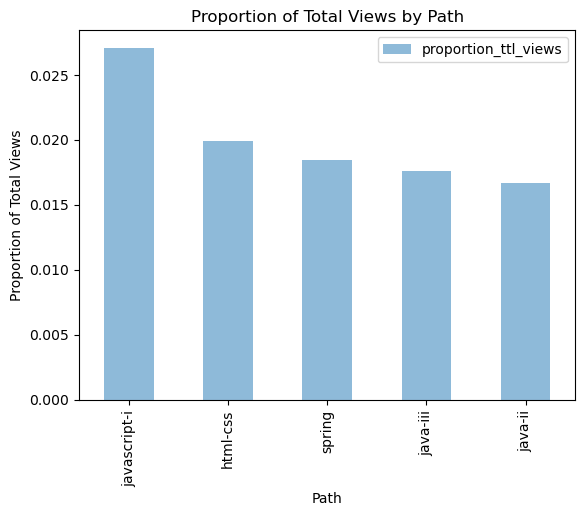

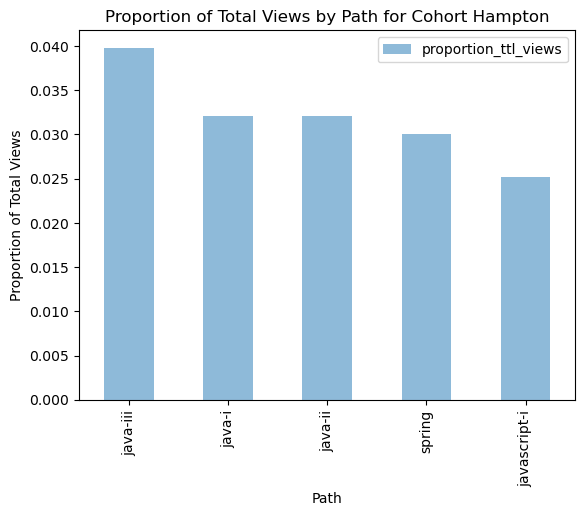

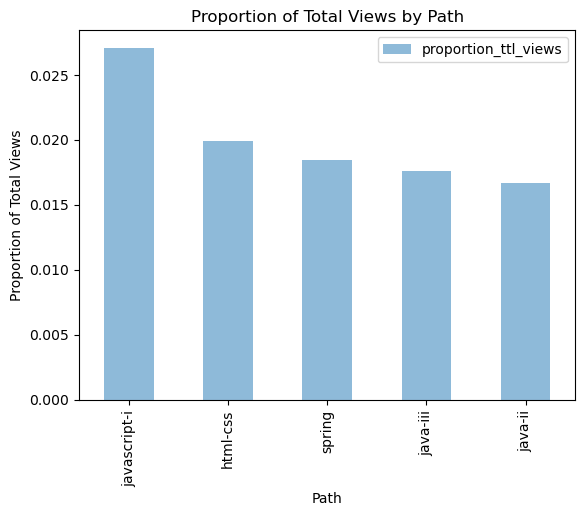

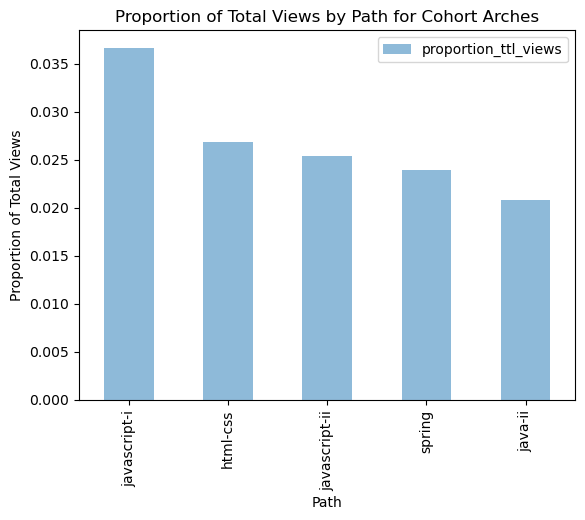

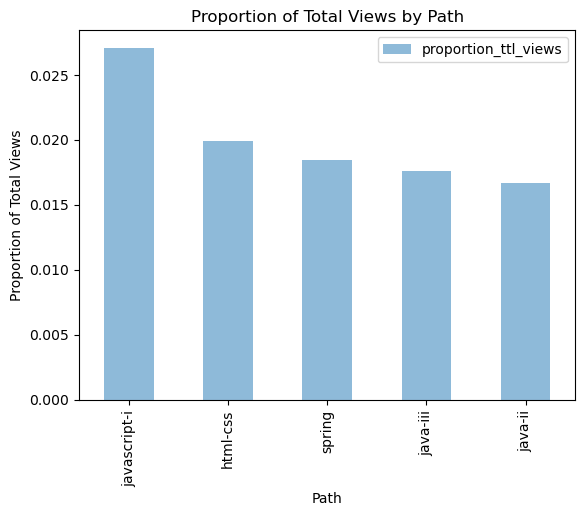

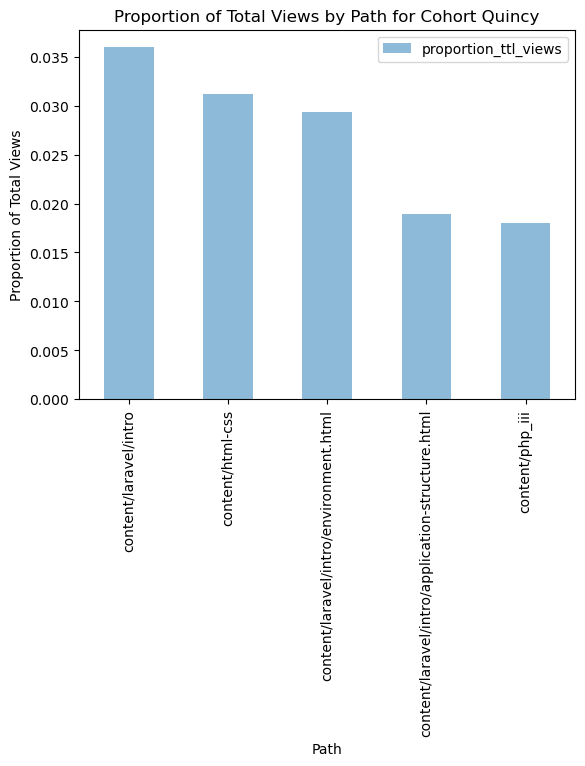

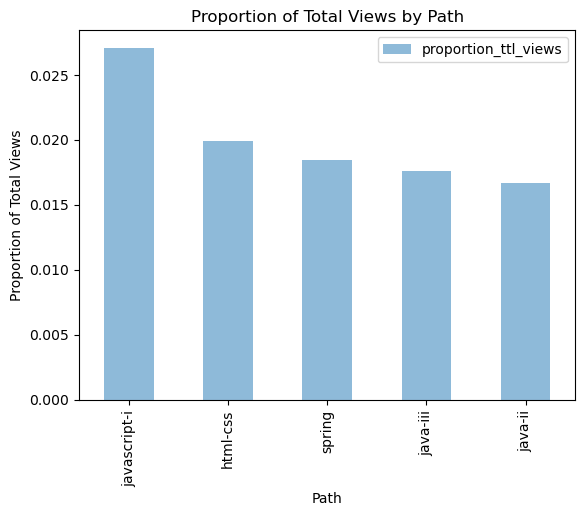

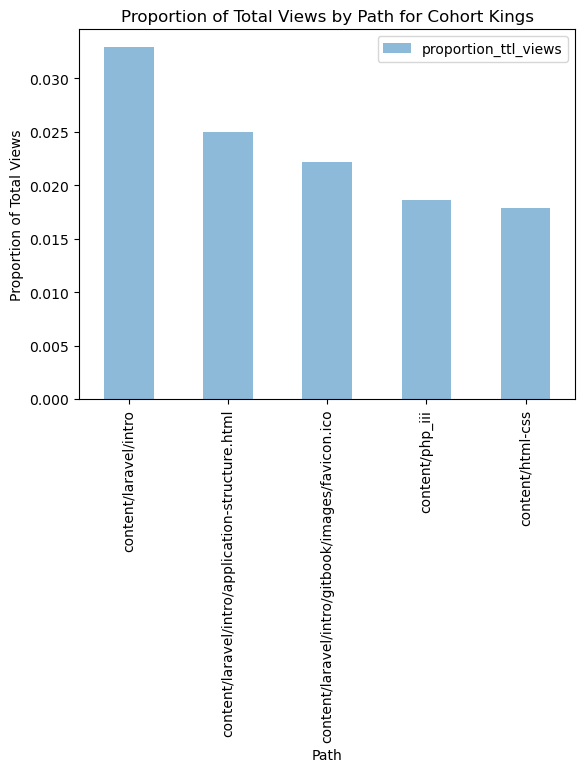

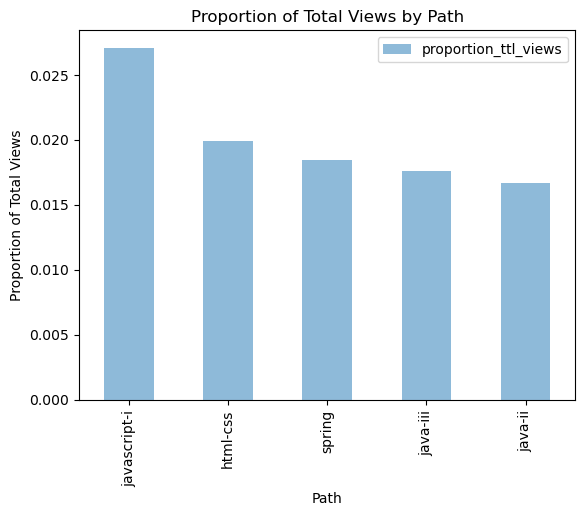

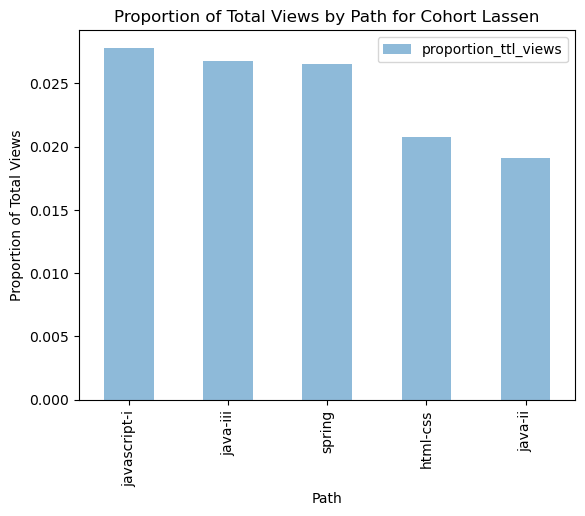

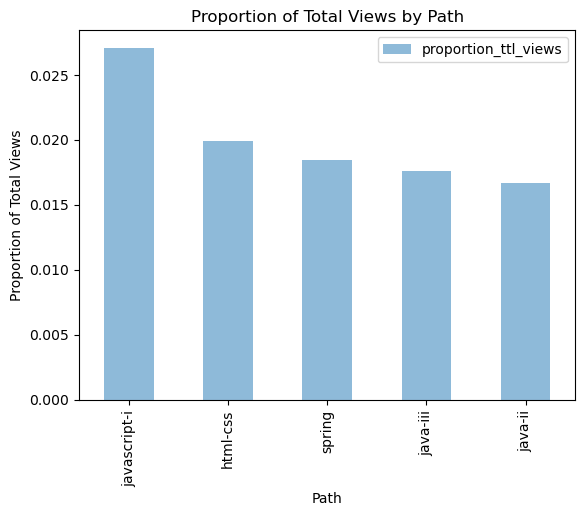

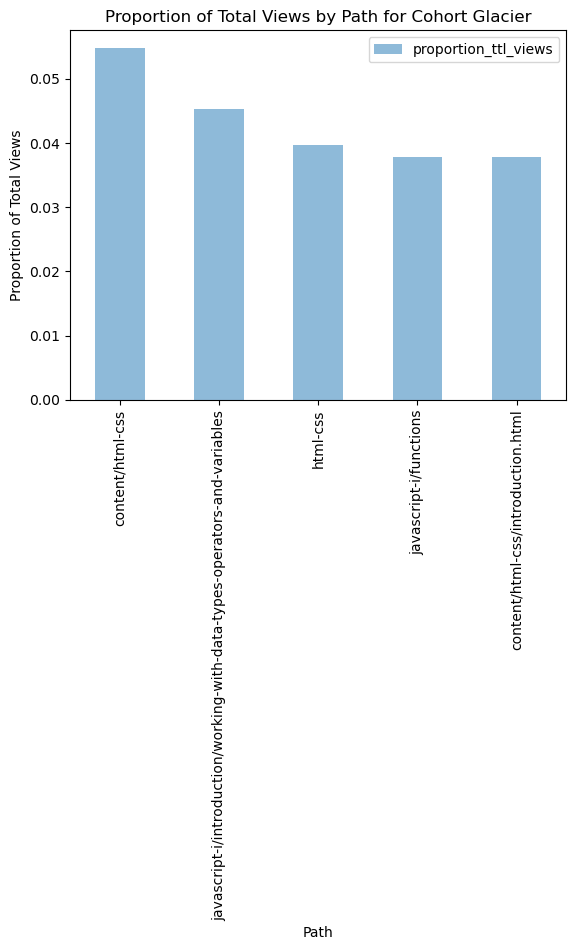



Cohort Denali does not have enough paths to compare.


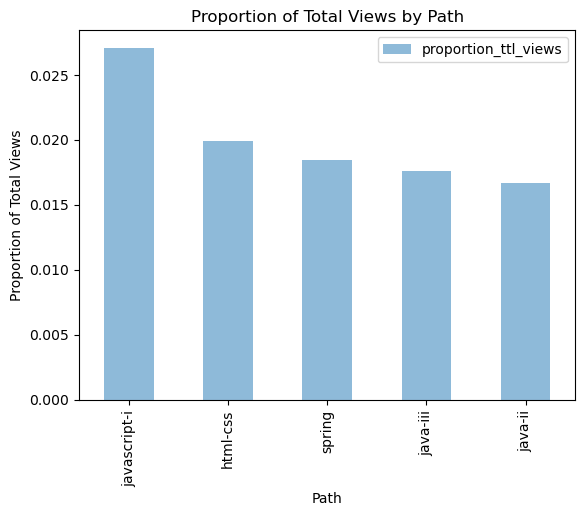

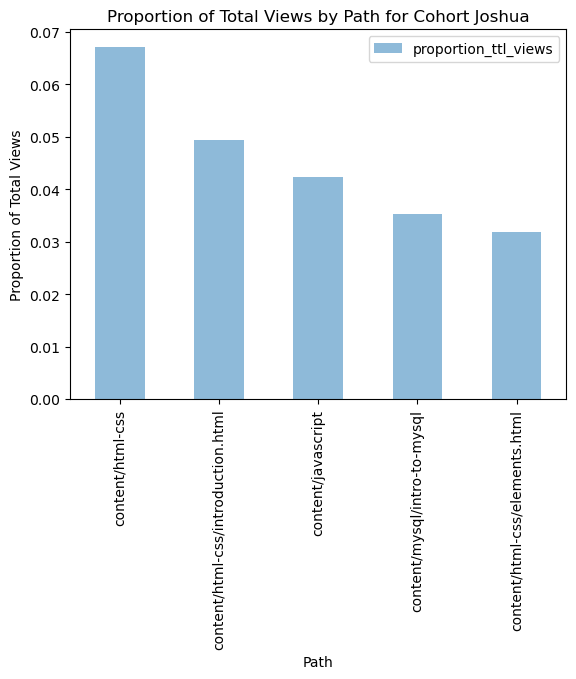

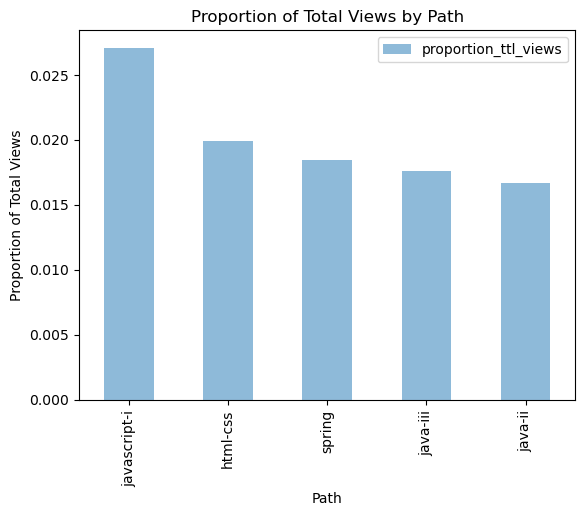

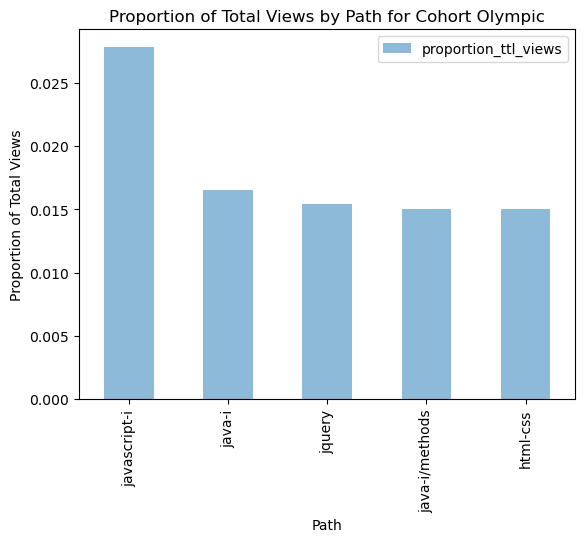

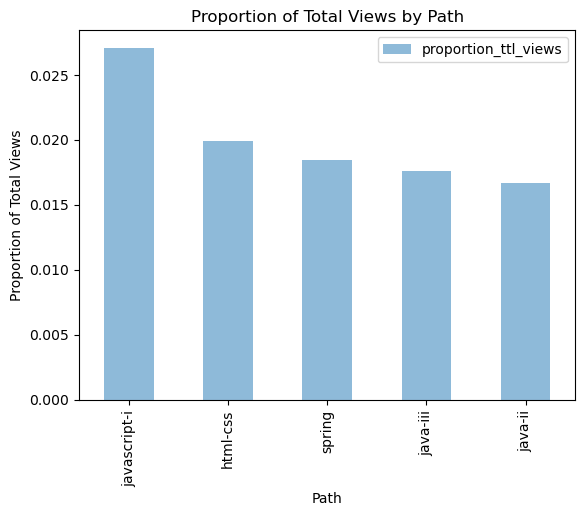

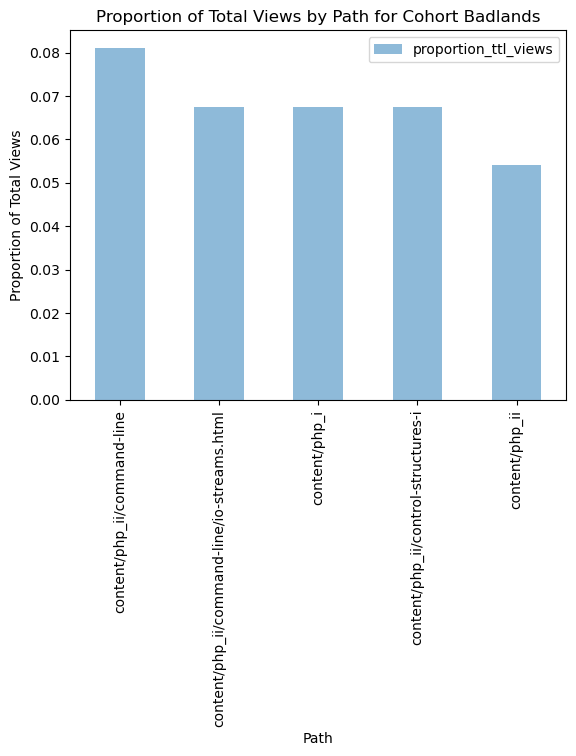

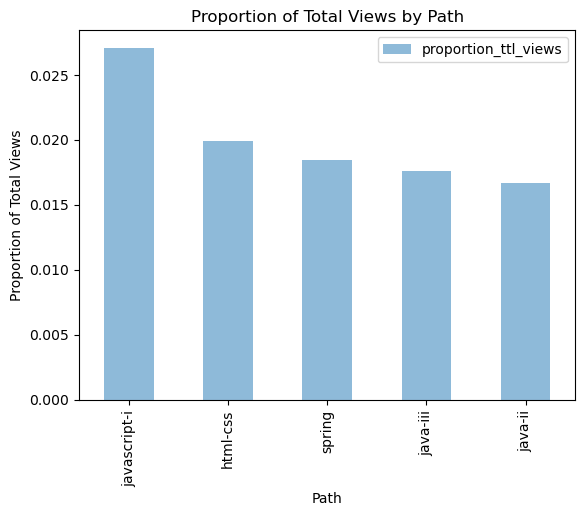

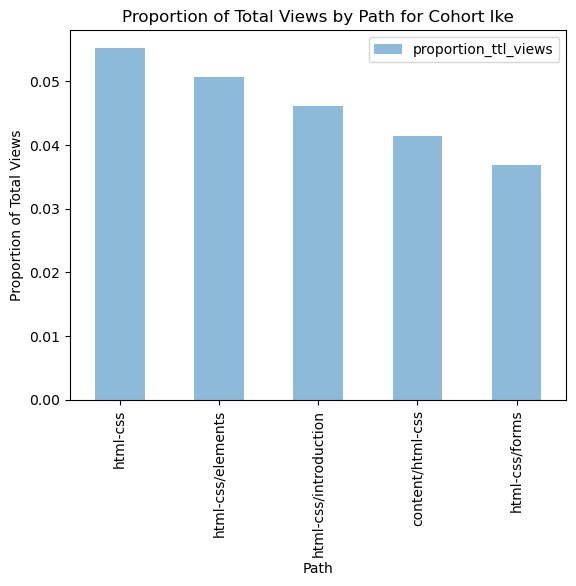

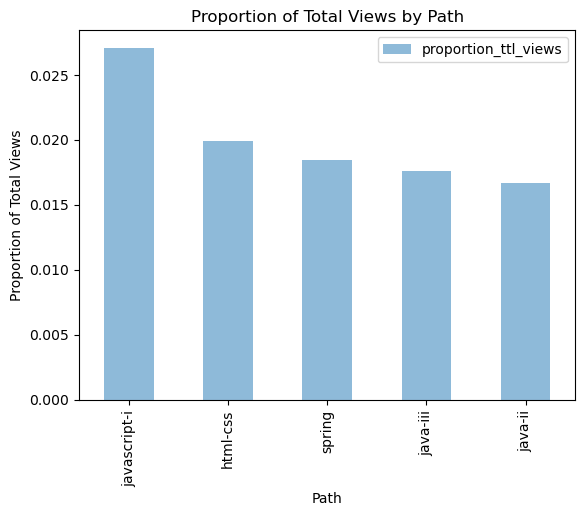

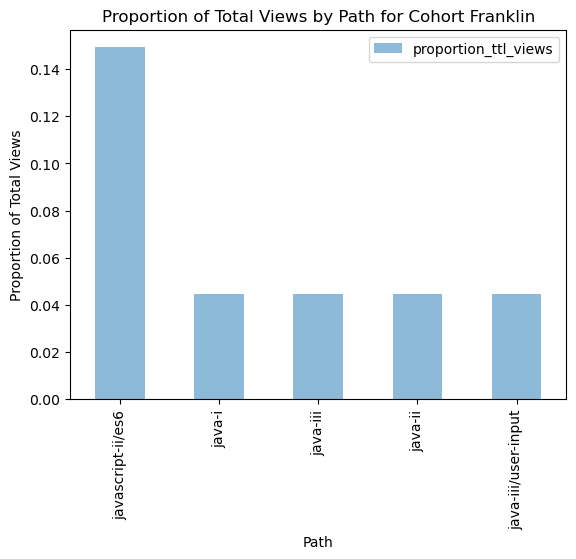



Cohort Everglades does not have enough paths to compare.


In [41]:
e.viz_top_lessons(wd1)

#### Takeaways for WD1 cohort:
- Quincy, Kings, and Badlands seemed to be learning PHP instead of java.
- Franklin had a large percentage of views of javascript_ii/es6

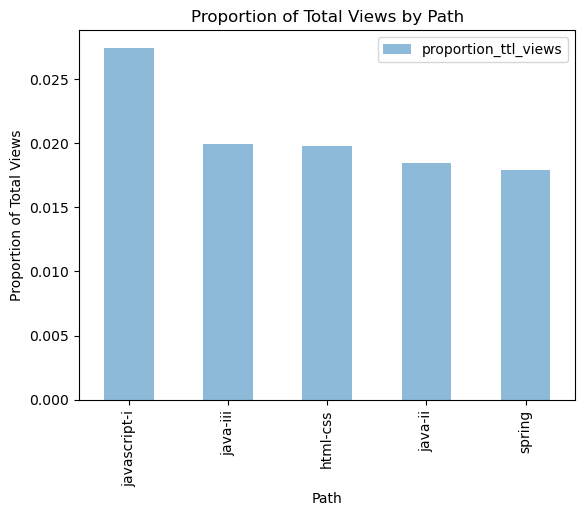

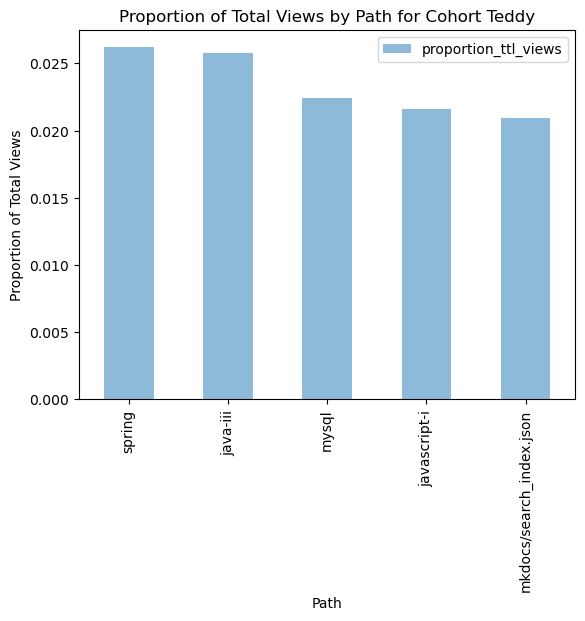

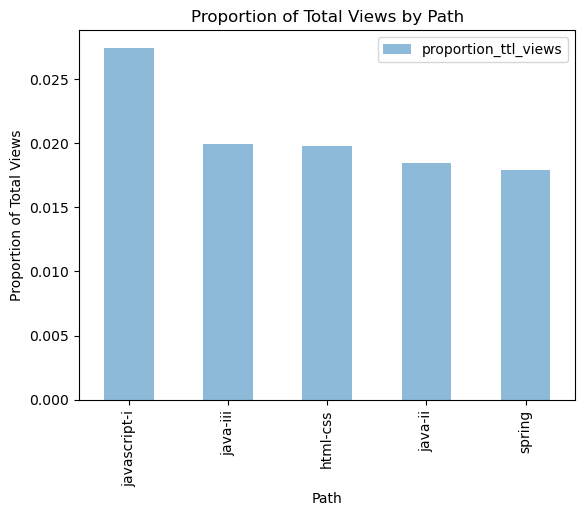

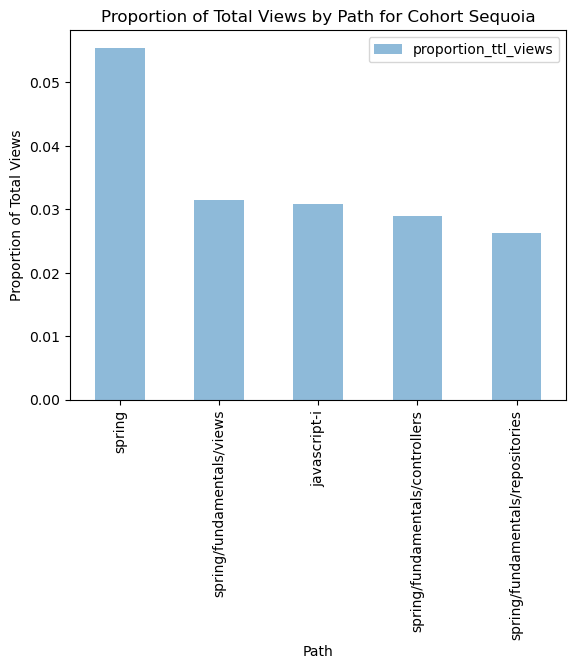

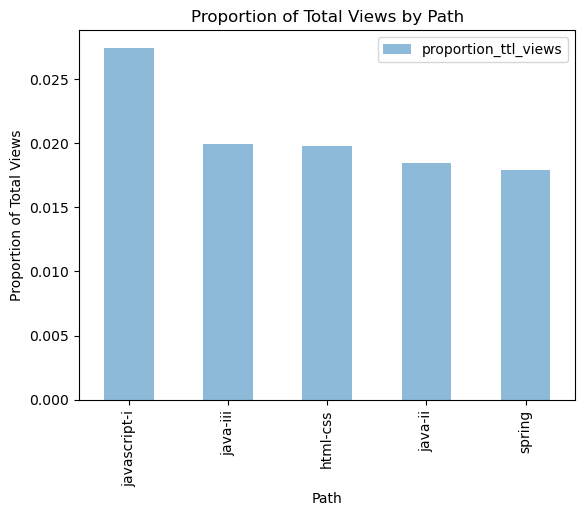

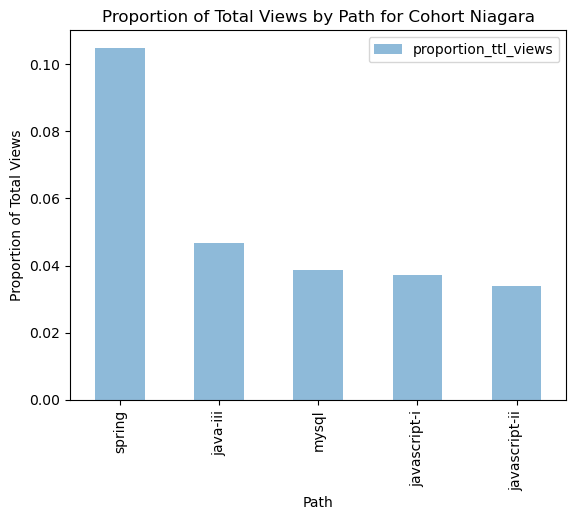

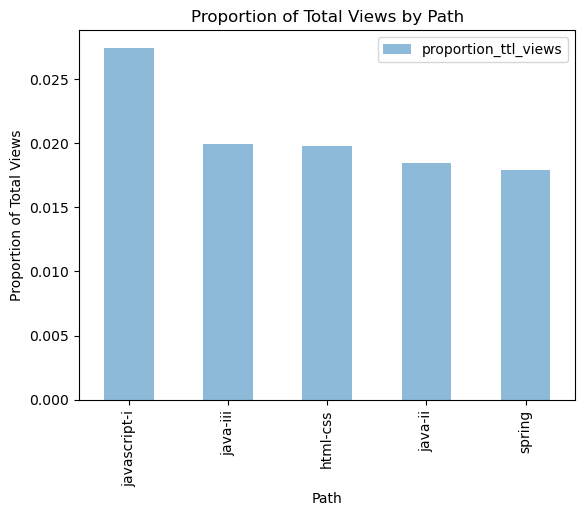

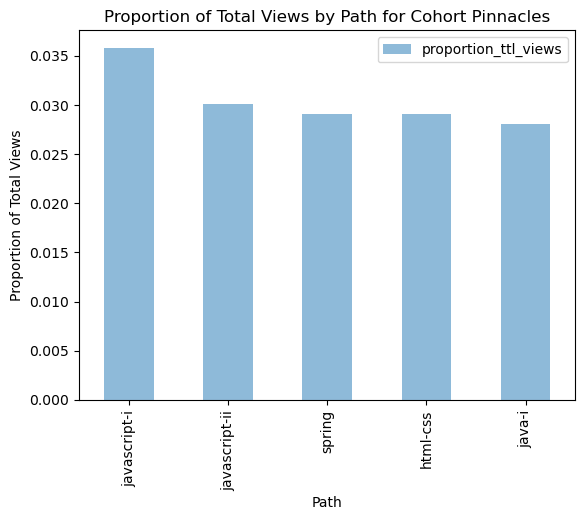

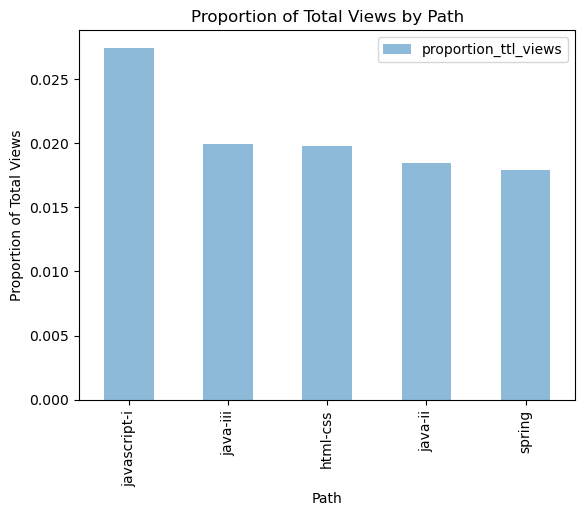

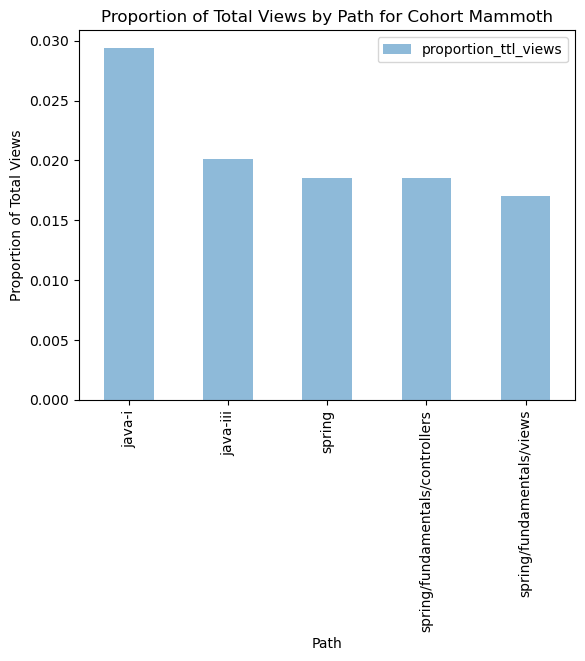

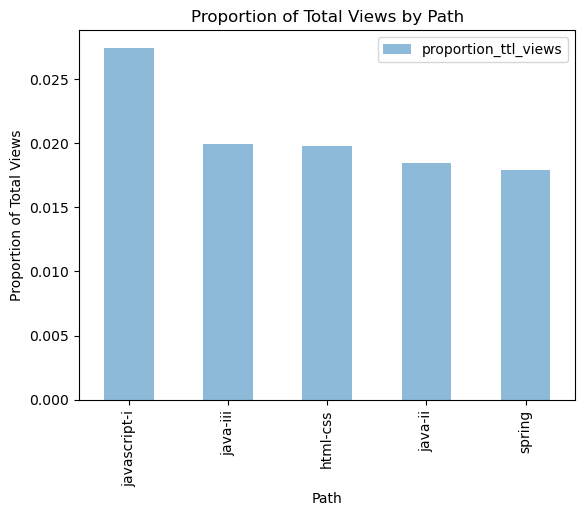

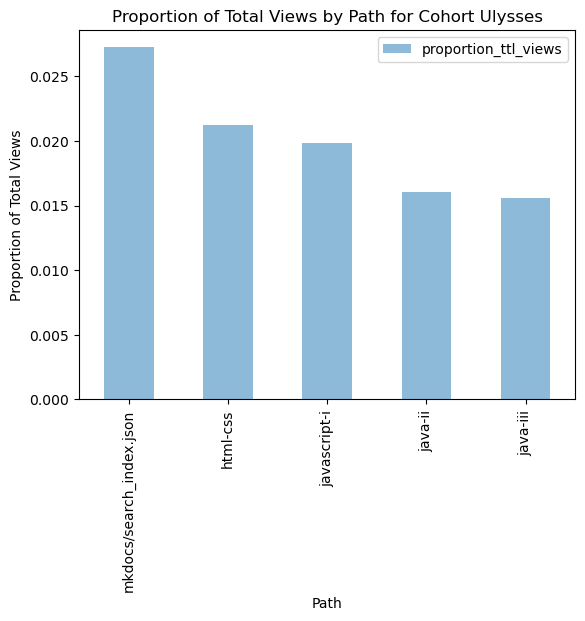

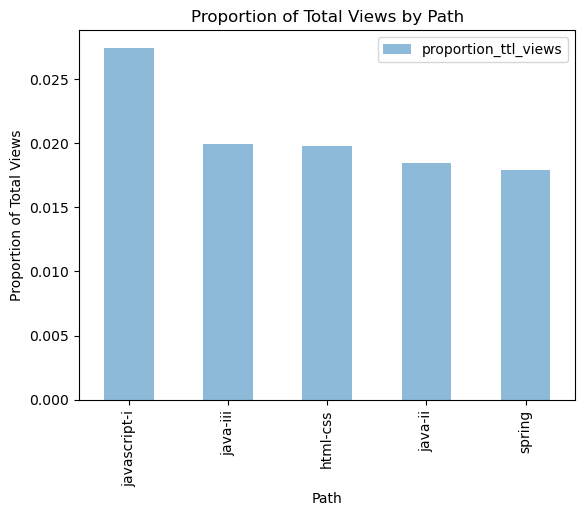

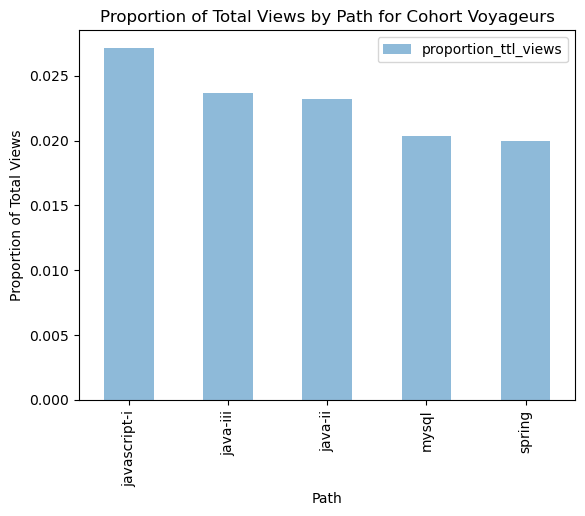

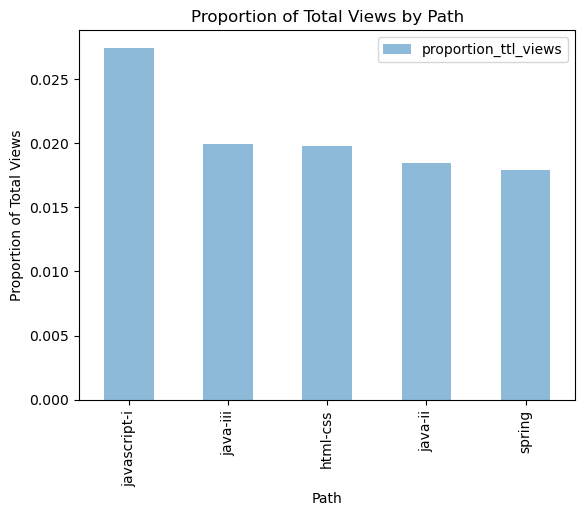

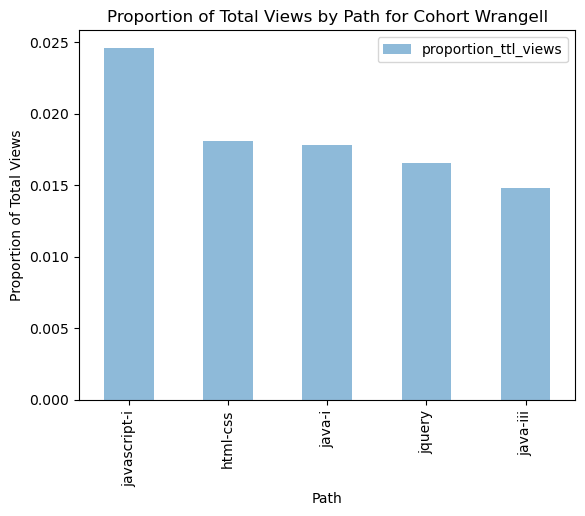

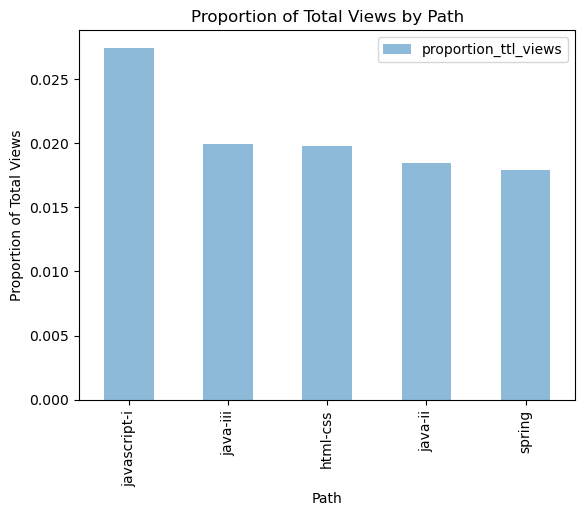

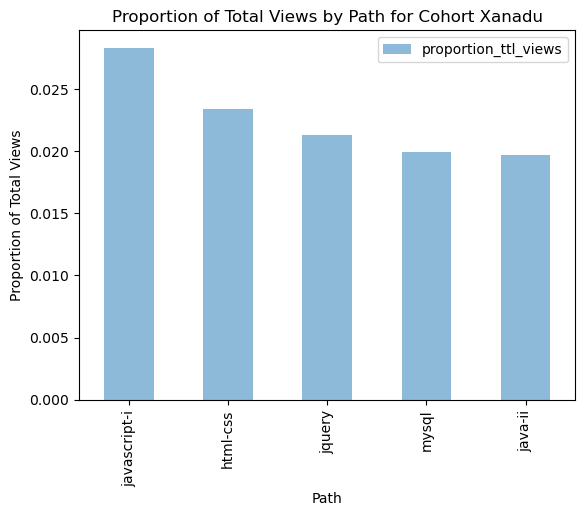

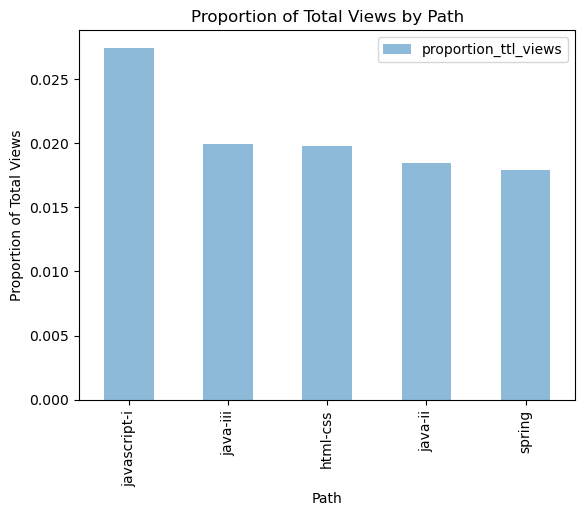

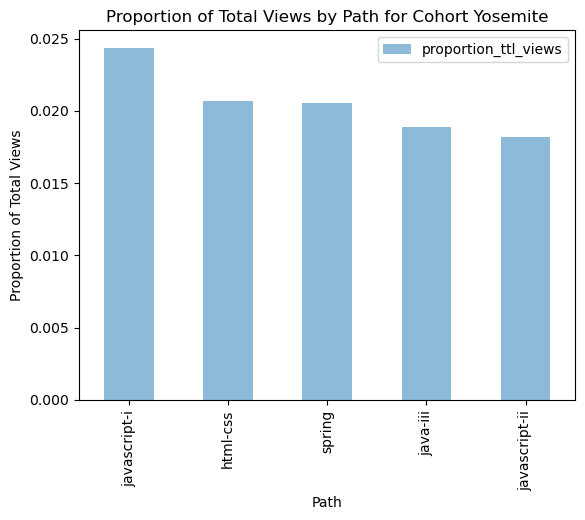

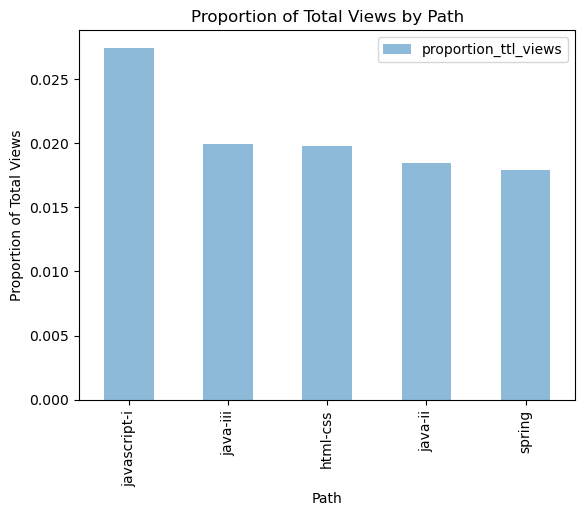

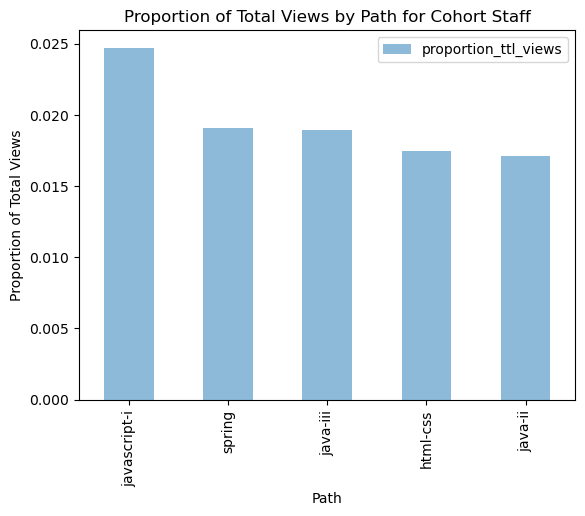

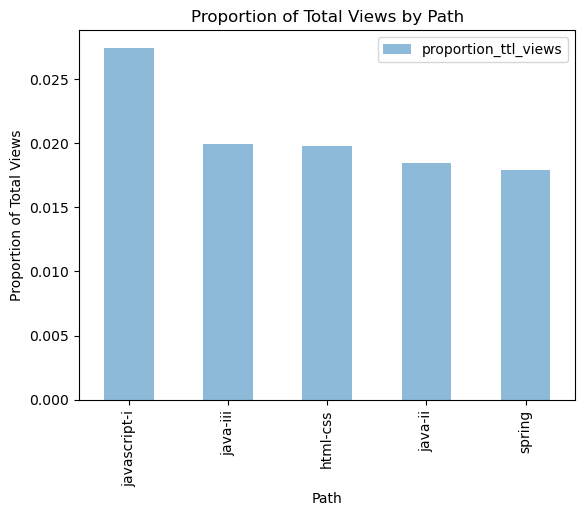

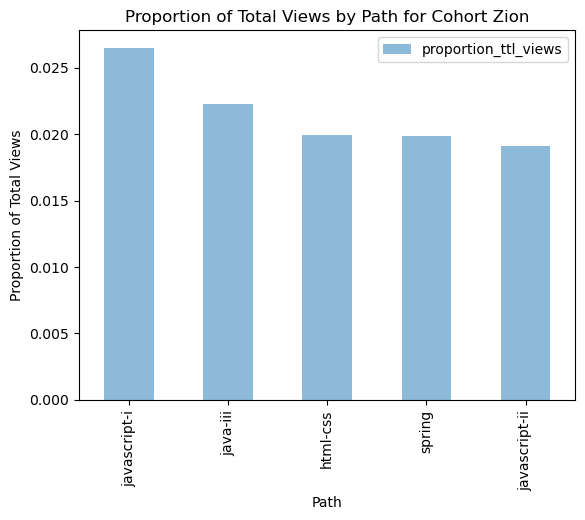

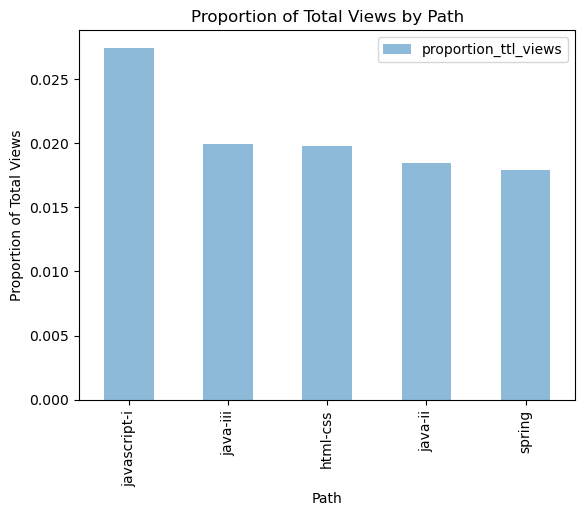

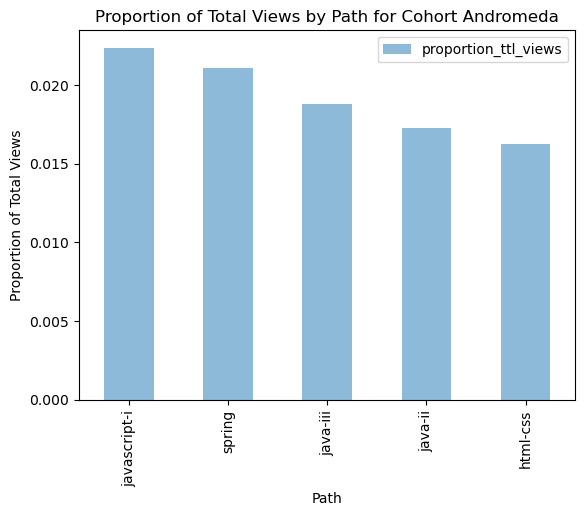

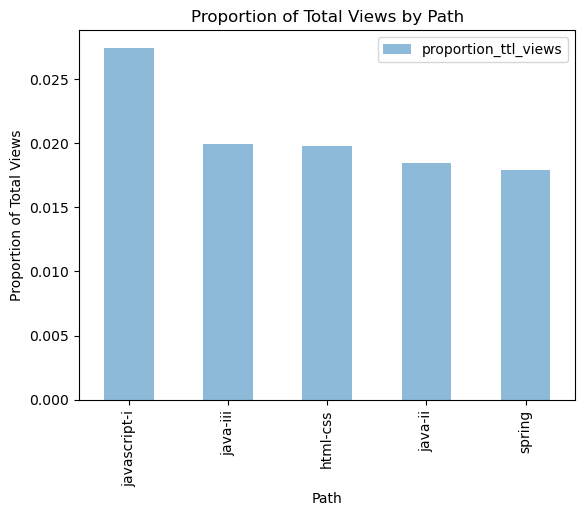

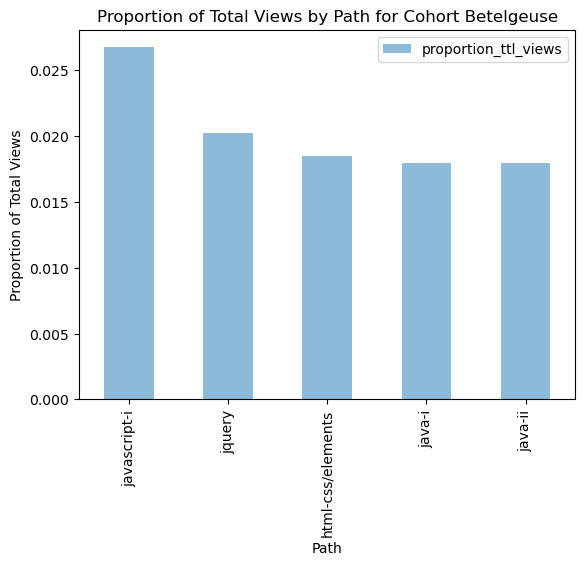

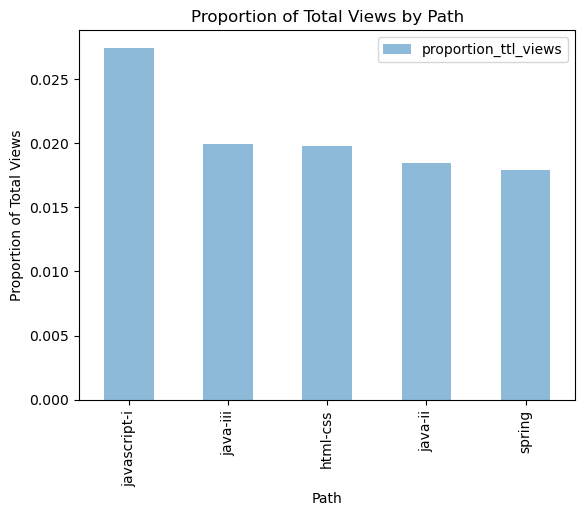

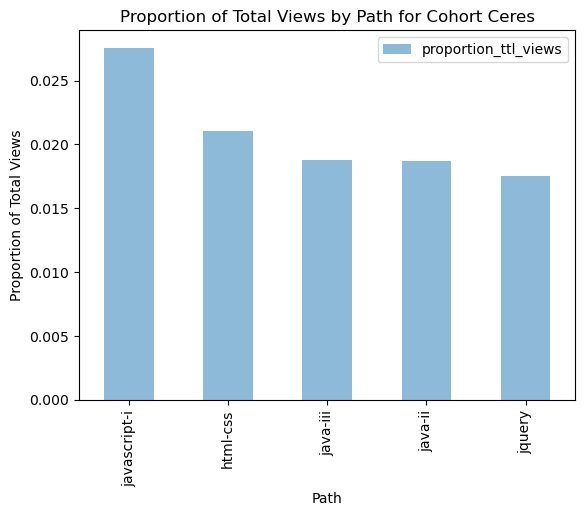

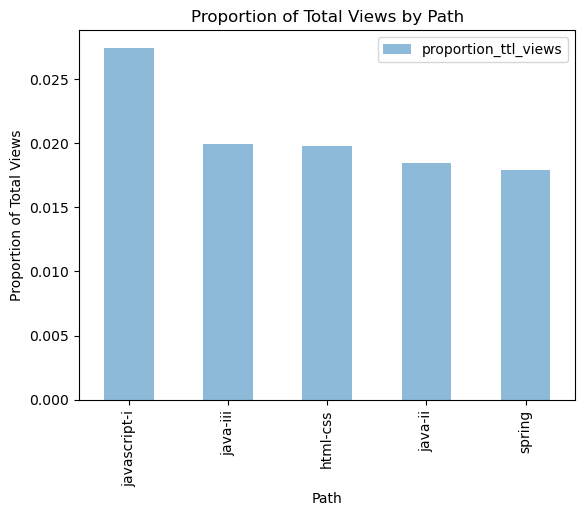

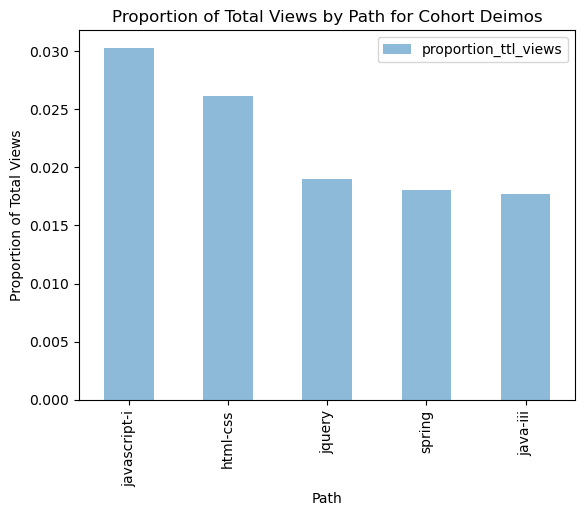

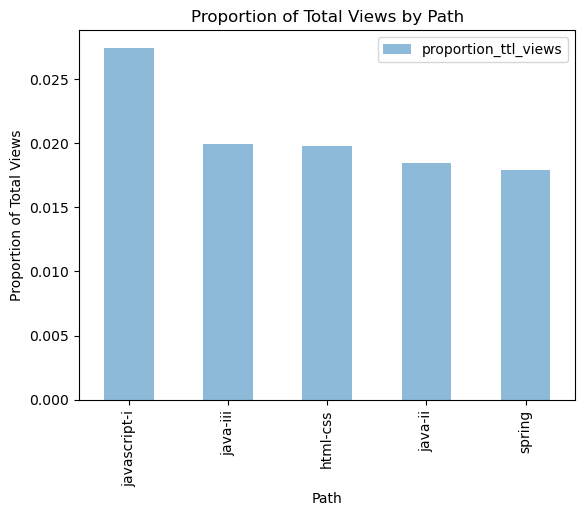

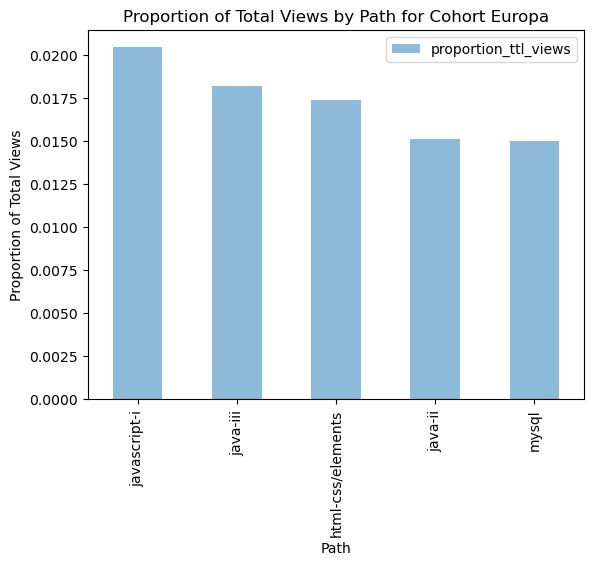

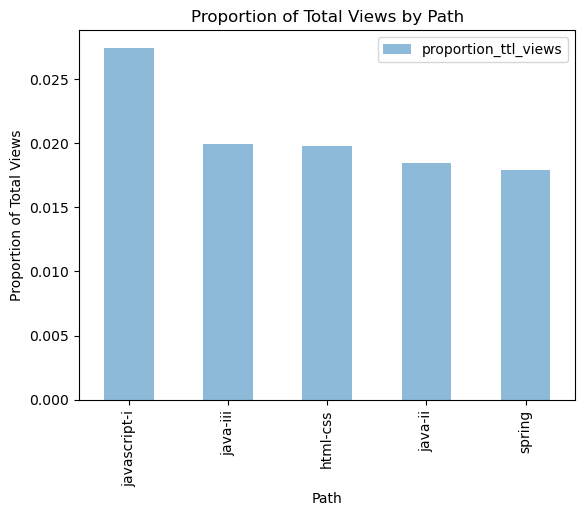

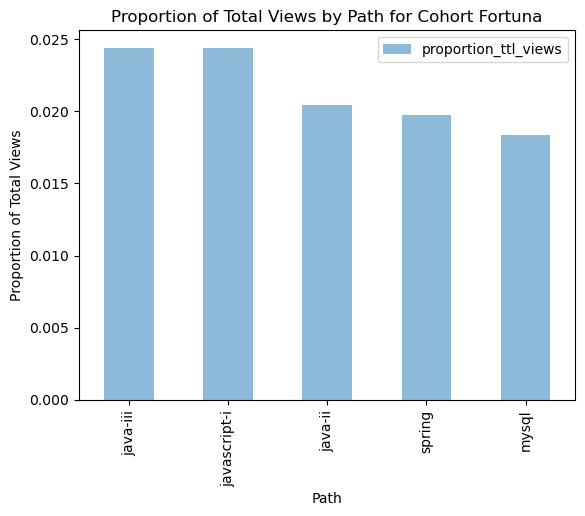

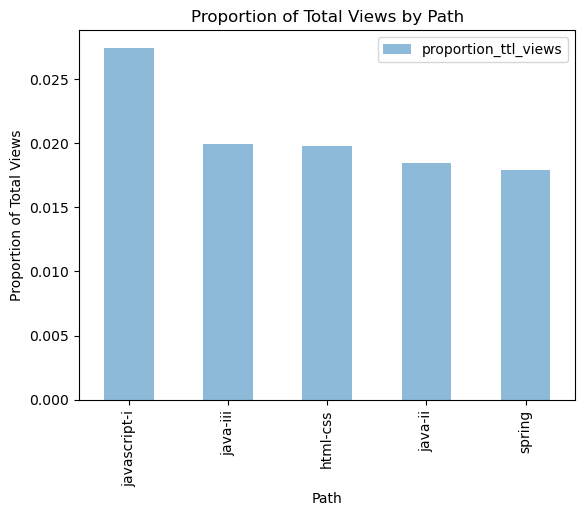

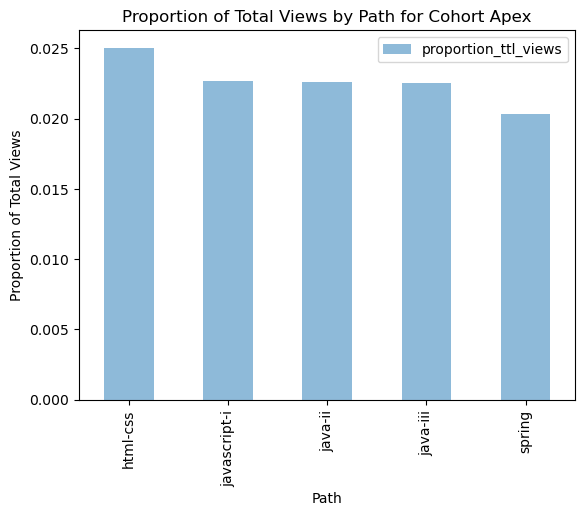

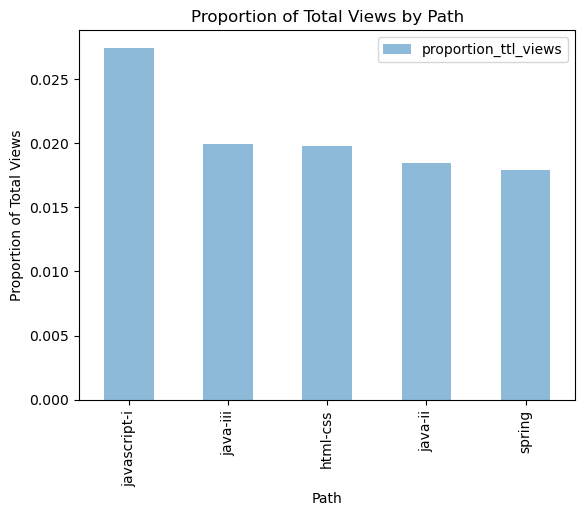

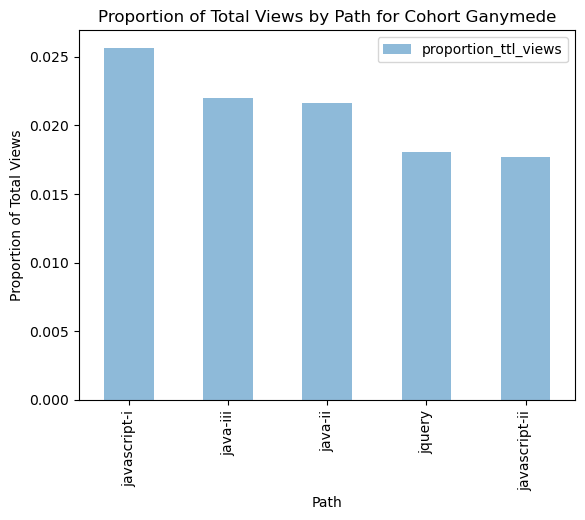

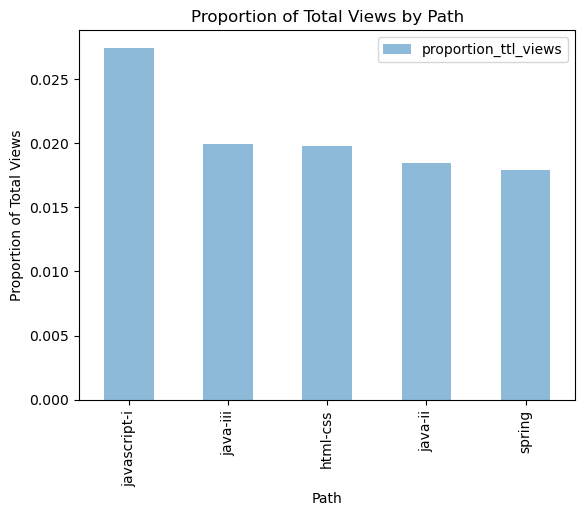

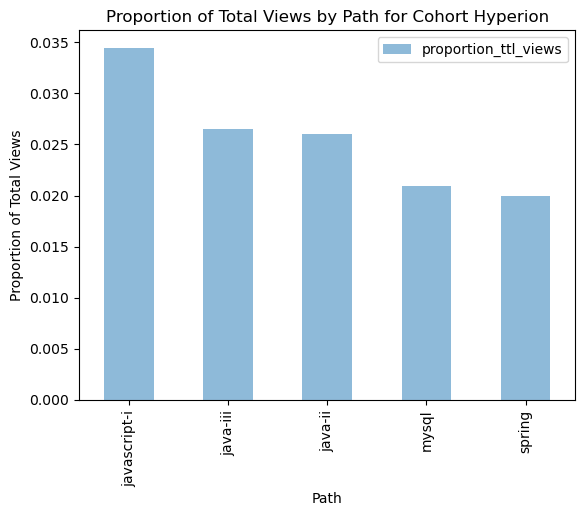

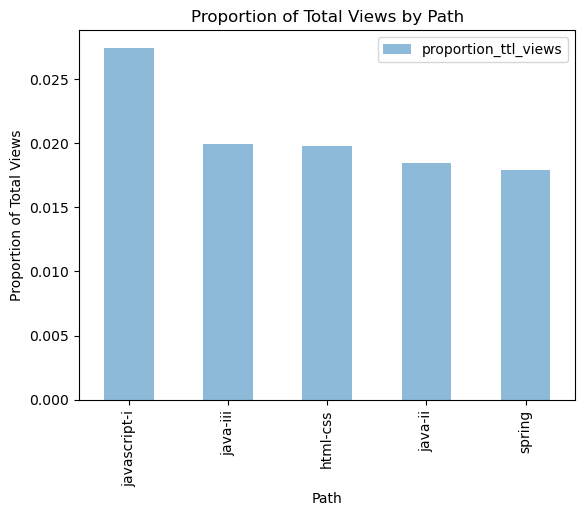

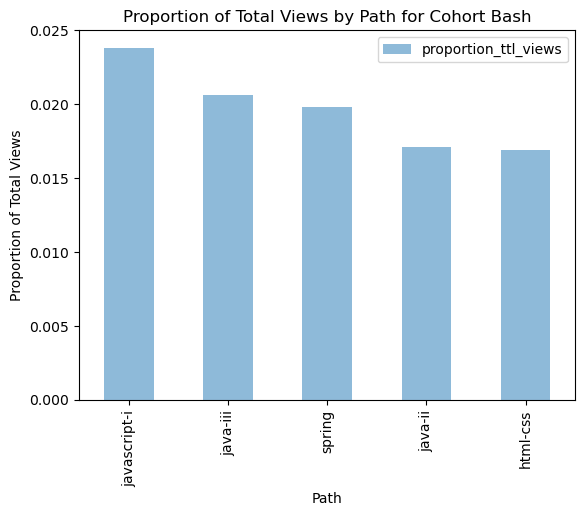

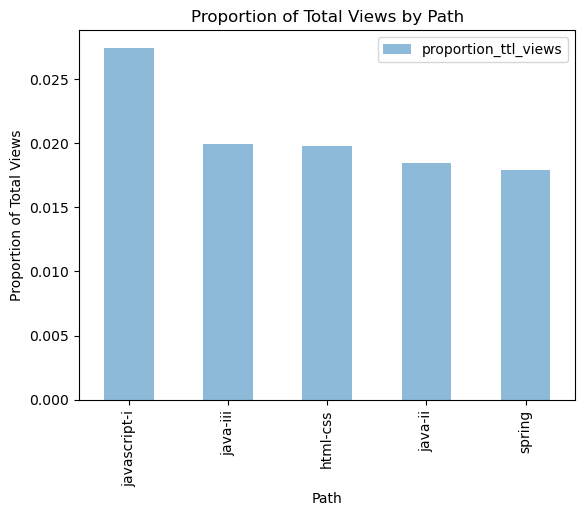

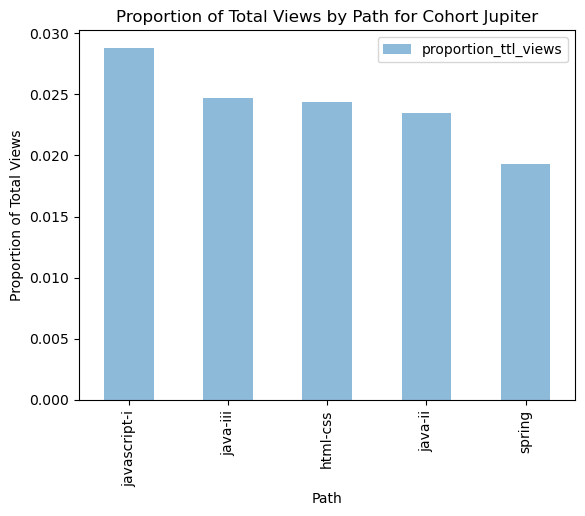

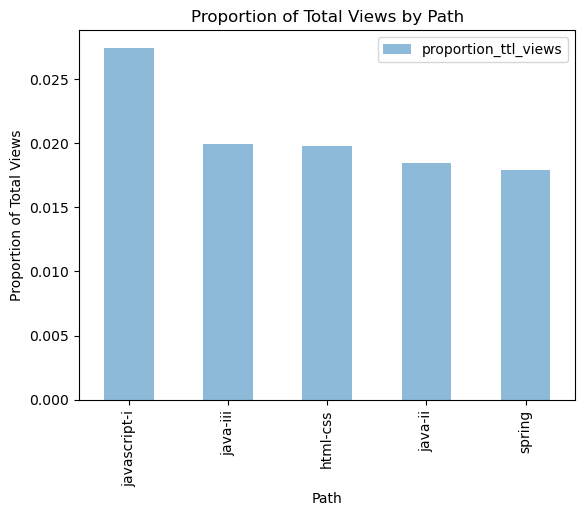

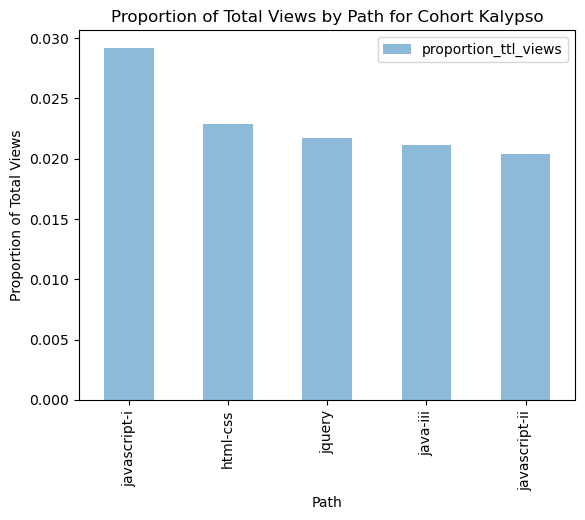

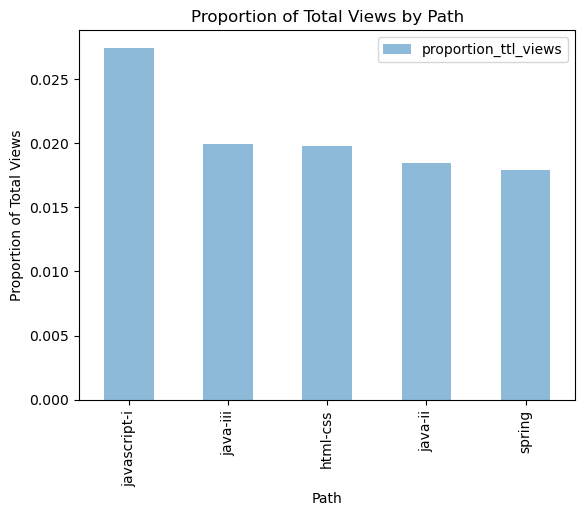

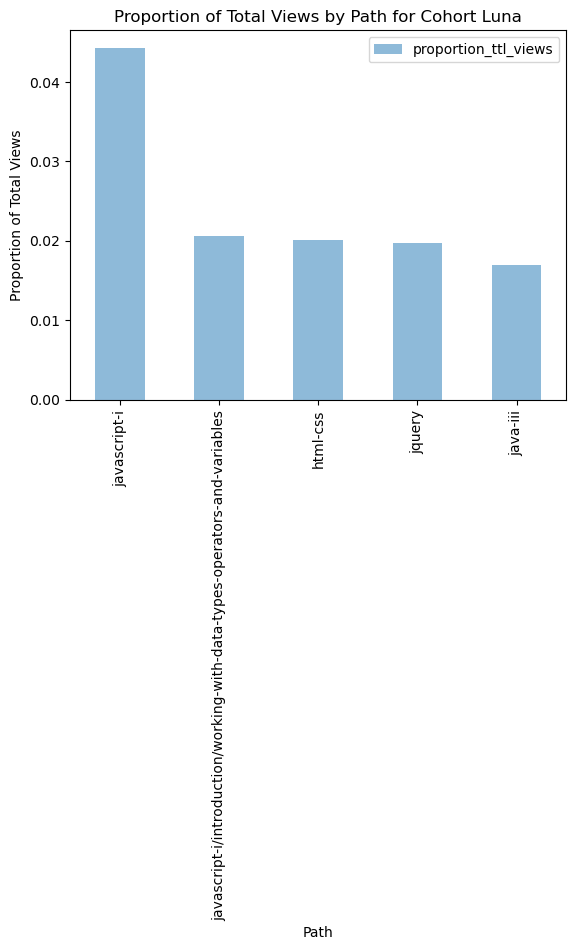

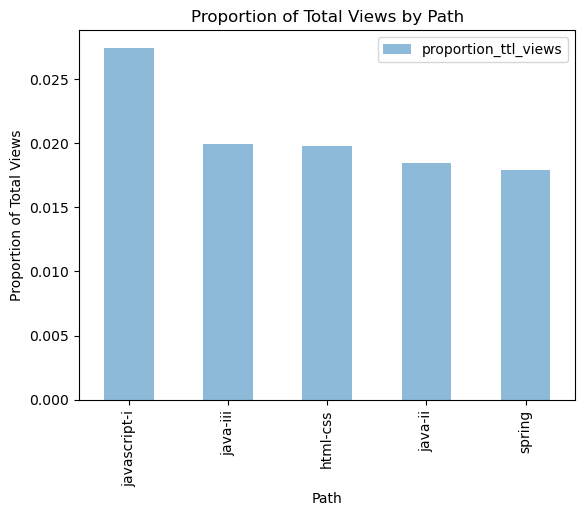

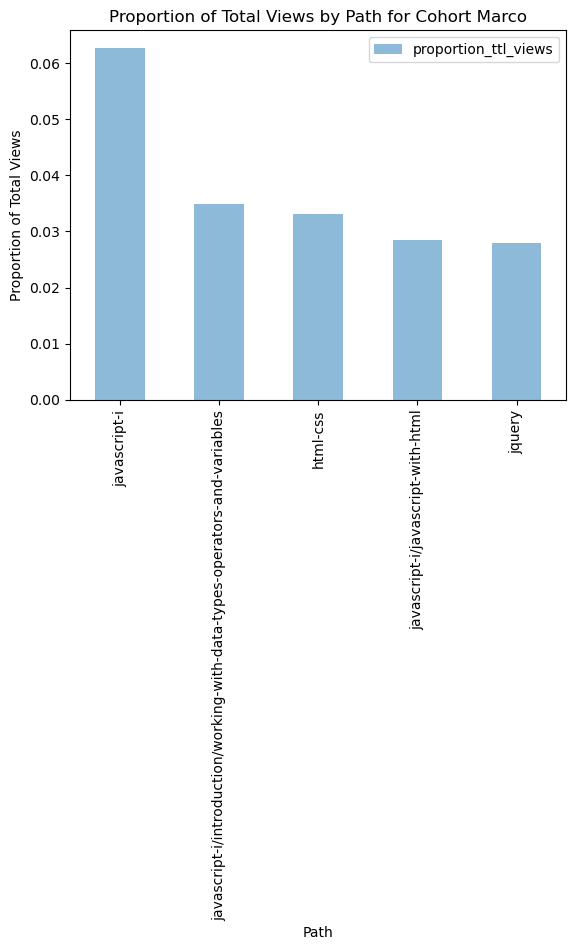

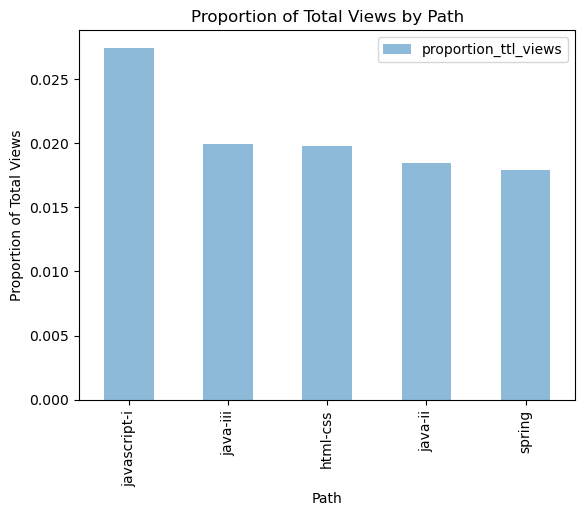

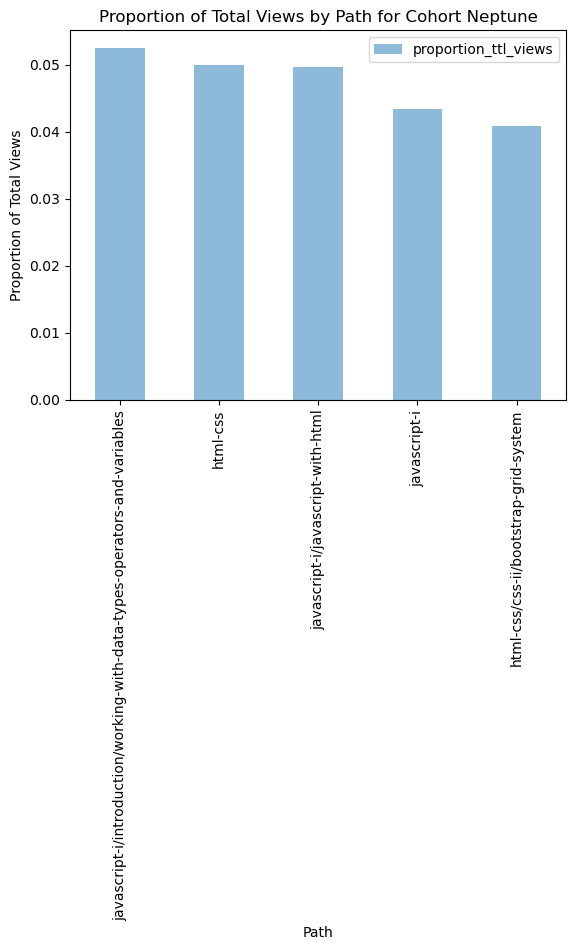

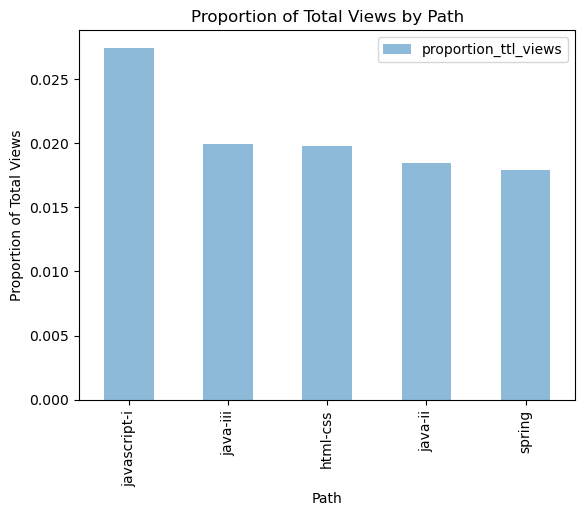

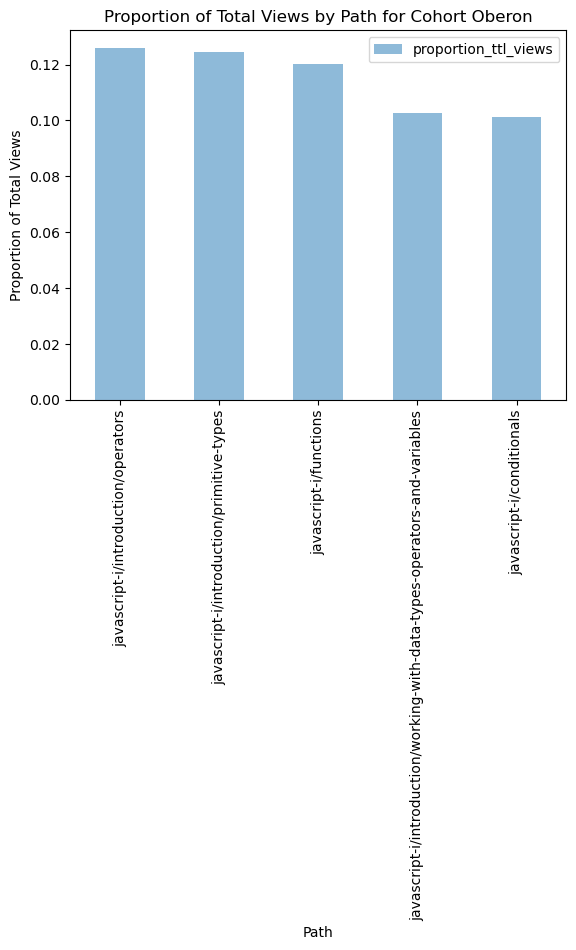

In [42]:
# now let's look at wd2
e.viz_top_lessons(wd2)

#### Takeaways for WD2 cohort:
- Teddy and Ulysses had high mkdocs/search_index.json. This may be an index not a lesson.
- Sequoia and Mammoth were both high in Spring related pages.

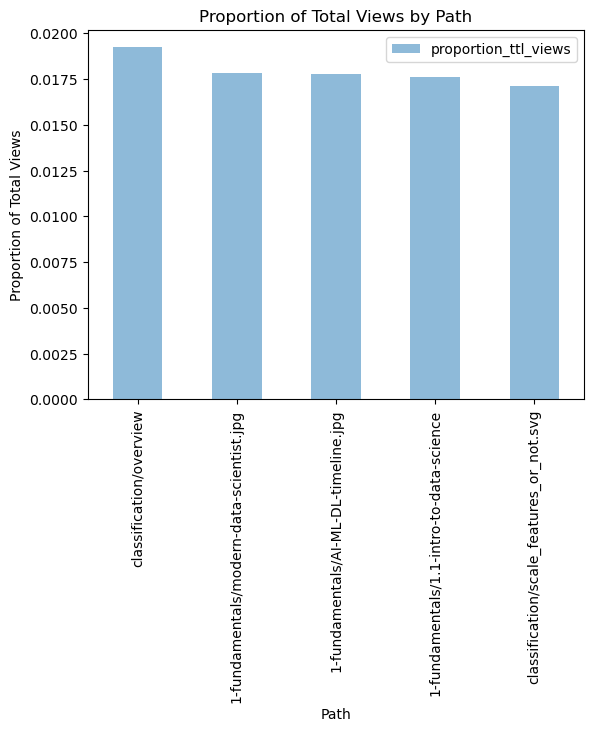

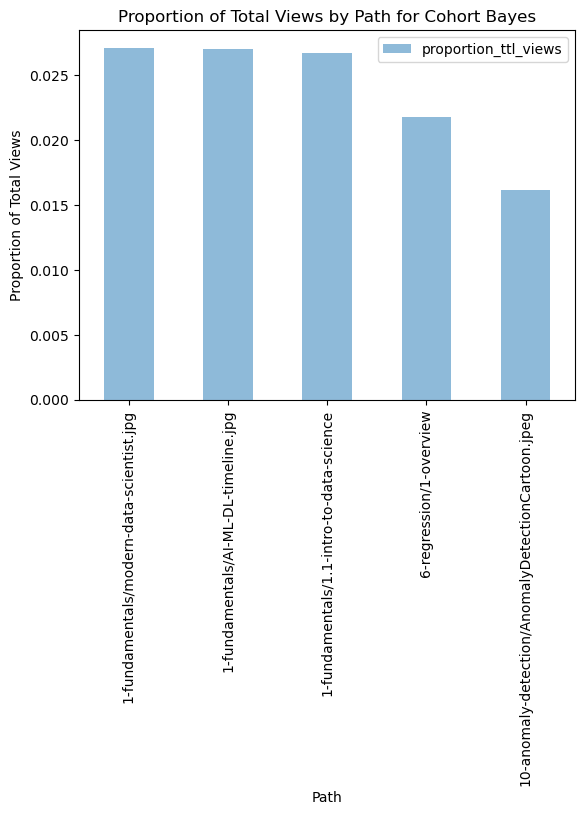

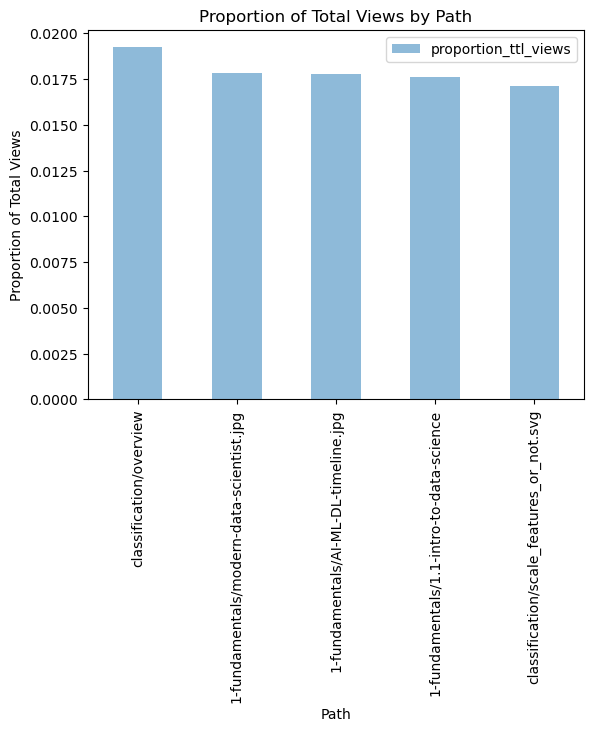

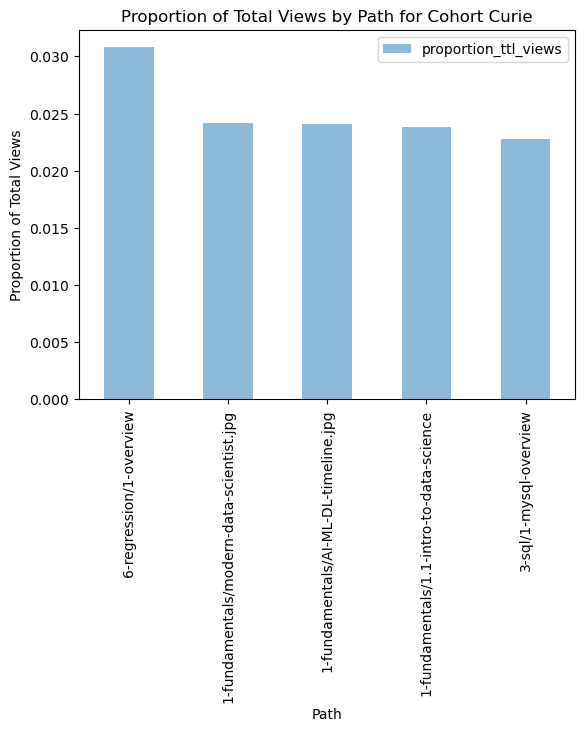

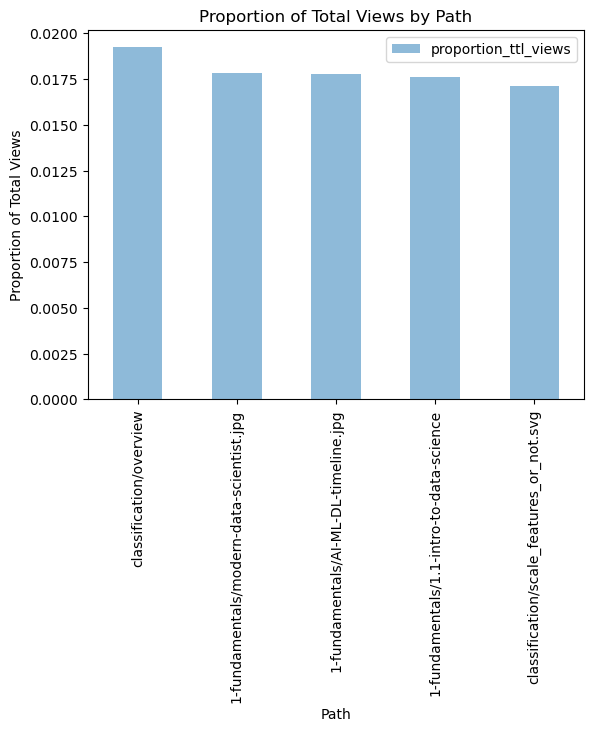

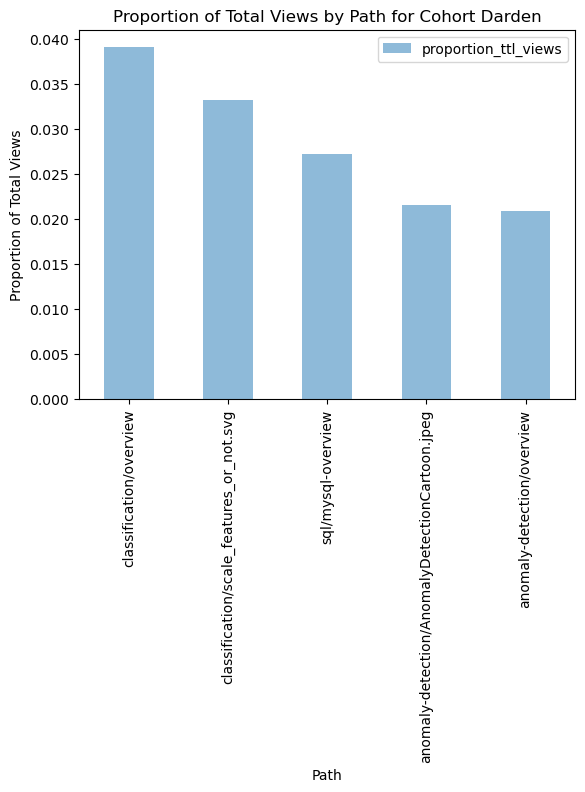

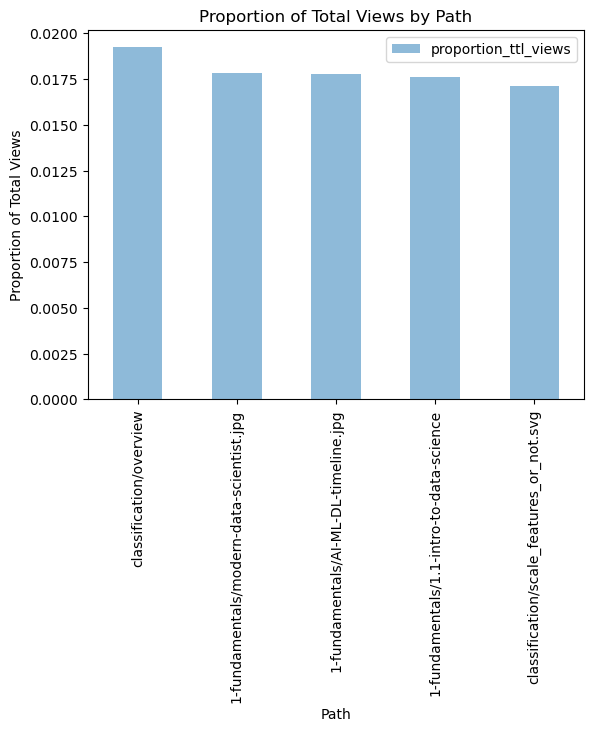

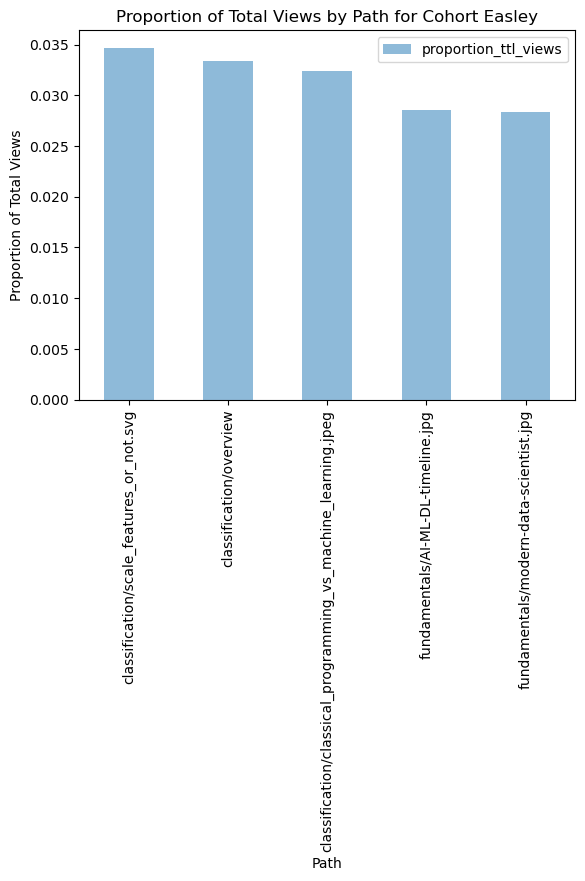

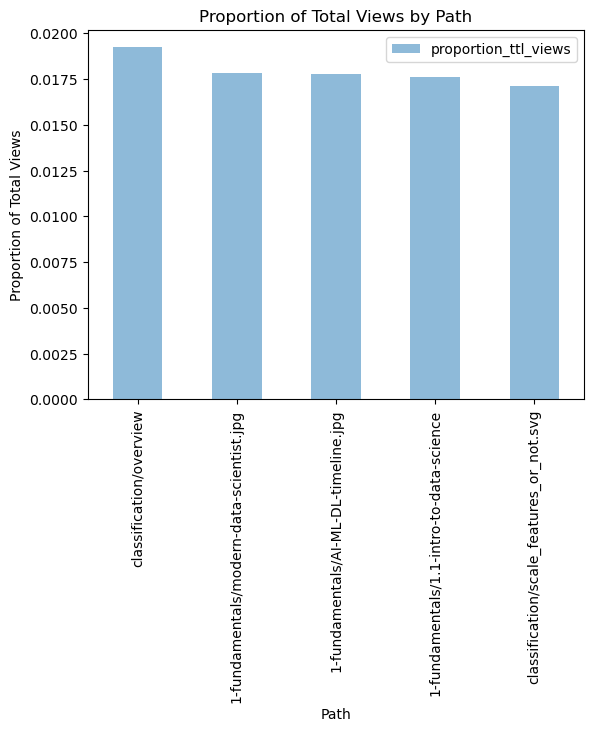

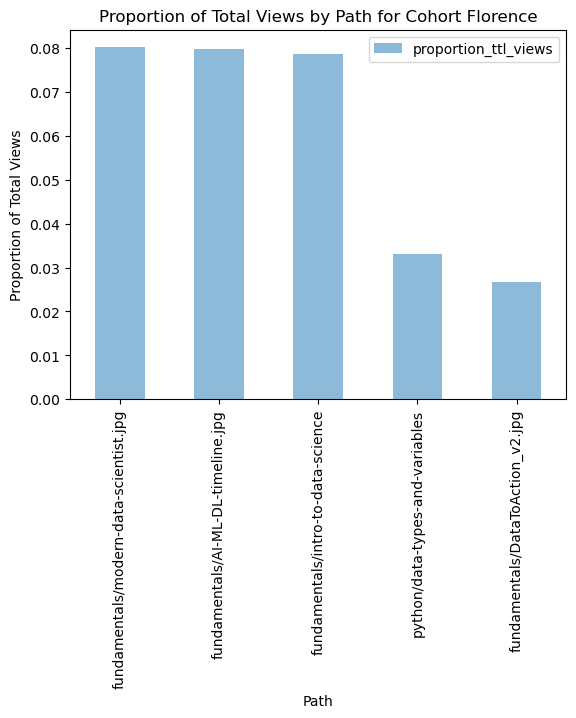

In [43]:
# now let's look at ds
e.viz_top_lessons(ds)

#### Takeaways for DS cohorts:
- Curie had high 6-regression/1-overview
- Darden had high MySQL and Anomaly Detection

#### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


#### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


#### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


#### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [44]:
# going to check top topics after cohort end_date for each program_id

# top lessons for whole program id
# def top_lessons_after_active(df):
#     '''
#     function takes in a dataframe and returns the top lesson paths 
#     visited by program after cohorts were no longer active students.
#     Arguments: A DataFrame from curriculum_logs db
#     Returns: DataFrame of top lessons post-active students for the input df.'''
#     # list of non-lesson paths
#     not_lessons = ['/', 'search/search_index.json', 'toc', 'index.html', 'appendix']
#     # make dataframes with only lesson paths:
#     lessons = df[~df.path.isin(not_lessons)]
#     lessons = lessons[lessons.end_date < lessons.index]
#     top_lessons = pd.DataFrame(
#             lessons.value_counts('path', normalize=True).head(), 
#             columns=['proportion_ttl_views']).reset_index()
    
    
#     return top_lessons

In [45]:
e.top_lessons_after_active(wd1)

,path,proportion_ttl_views
0,javascript-i,0.027083
1,html-css,0.019944
2,spring,0.018435
3,java-iii,0.017626
4,java-ii,0.016706


In [46]:
e.top_lessons_by_program(wd1)

,path,proportion_ttl_views
0,javascript-i,0.027083
1,html-css,0.019944
2,spring,0.018435
3,java-iii,0.017626
4,java-ii,0.016706


In [47]:
# checking max end_date for program 1
df[df.program_id == 1].end_date.max()

Timestamp('2017-09-22 00:00:00')

#### Top lessons accessed by wd1 after graduation:
    - javascript-i
    - java-iii
    - html-css
    - spring:
- the pages visited after students were active are the same as those from all periods.
- this makes sense since all of the cohorts in this program had end dates before this period of curriculum logs started.

In [48]:
# now checking most popular lessons after end date for wd2:
e.top_lessons_after_active(wd2)

,path,proportion_ttl_views
0,javascript-i,0.031076
1,spring,0.027684
2,html-css,0.023088
3,java-iii,0.022479
4,java-ii,0.021951


In [49]:
e.top_lessons_by_program(wd2)

,path,proportion_ttl_views
0,javascript-i,0.027424
1,java-iii,0.019925
2,html-css,0.019745
3,java-ii,0.018410
4,spring,0.017871


#### Top lessons accessed by wd2 after graduation:
    - javascript-i
    - java-iii
    - html-css
    - spring
    

In [50]:
# now checking most popular lessons after end date for ds:
e.top_lessons_after_active(ds)

,path,proportion_ttl_views
0,sql/mysql-overview,0.028631
1,classification/overview,0.027798
2,classification/scale_features_or_not.svg,0.022905
3,anomaly-detection/AnomalyDetectionCartoon.jpeg,0.020094
4,anomaly-detection/overview,0.019885


In [51]:
# v. top lessons all time
e.top_lessons_by_program(ds)

,path,proportion_ttl_views
0,classification/overview,0.019228
1,1-fundamentals/modern-data-scientist.jpg,0.017828
2,1-fundamentals/AI-ML-DL-timeline.jpg,0.017785
3,1-fundamentals/1.1-intro-to-data-science,0.017591
4,classification/scale_features_or_not.svg,0.017128


#### Top lessons accessed by ds after graduation:
    - sql/mysql-overview
    - classification/overview
    - classification/scale_features_or_not.svg
    - anomaly-detection/AnomalyDetectionCartoon.jpeg
    - anomaly-detection/overview
    